In [ ]:
# plot the results in the presence of a  free-surface case

In [1]:
import numpy as np
from PathConfig import *
from ParamConfig import *
import scipy.io as spio
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# load true model
model_true = (np.fromfile(data_path, np.float32).reshape(vmodel_dim[1],vmodel_dim[0]))
model_true = np.transpose(model_true,(1,0))

In [3]:
# load initial model of marmousi
ResultPath = main_dir + 'Comparison/marmousi/'
initfile = ResultPath+str(dataname)+'_initmodel.mat'
model_mat = spio.loadmat(initfile)
model_init = np.float32(model_mat[str('initmodel')])

In [35]:
# load result of FWIL2
l2file = ResultPath+'FWIRec_L2.mat'
mat = spio.loadmat(l2file)
model_l2 = np.float32(mat[str('rec')])

# load result of FWIW1
w1file = ResultPath+'FWIRec_W1.mat'
mat = spio.loadmat(w1file)
model_w1 = np.float32(mat[str('rec')])

# load result of FWIDIP
dipfile = ResultPath+'DIPRec.mat'
mat = spio.loadmat(dipfile)
model_dip = np.float32(mat[str('rec')])

# load result of FWIGAN
ganfile = ResultPath+'GANRec.mat'
mat = spio.loadmat(ganfile)
model_gan = np.float32(mat[str('rec')])

In [5]:
def compare_snr(img_test, img_true):
    return 20 * np.log10(np.linalg.norm(img_true.flatten()) / np.linalg.norm(img_true.flatten() - img_test.flatten()))
from utils.utils import ComputeSSIM,ComputeRE
l2_ssim = ComputeSSIM(model_l2,model_true)
w1_ssim = ComputeSSIM(model_w1,model_true)
dip_ssim = ComputeSSIM(model_dip,model_true)
gan_ssim = ComputeSSIM(model_gan,model_true)

l2_snr = compare_snr(model_l2,model_true)
w1_snr = compare_snr(model_w1,model_true)
dip_snr = compare_snr(model_dip,model_true)
gan_snr = compare_snr(model_gan,model_true)


l2_err = ComputeRE(model_l2,model_true)
w1_err = ComputeRE(model_w1,model_true)
dip_err = ComputeRE(model_dip,model_true)
gan_err = ComputeRE(model_gan,model_true)

np.savetxt(ResultPath+'compare_result.txt', 
                           np.hstack((l2_ssim, l2_snr, l2_err,
                                      w1_ssim, w1_snr,w1_err,
                                      dip_ssim, dip_snr,dip_err,
                                      gan_ssim, gan_snr,gan_err)),fmt='%5.4f')

/tmp/ipykernel_63718/3257519175.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.1, h_pad=1, w_pad=0.5, rect=[0, 0, 0.9, 0.95])


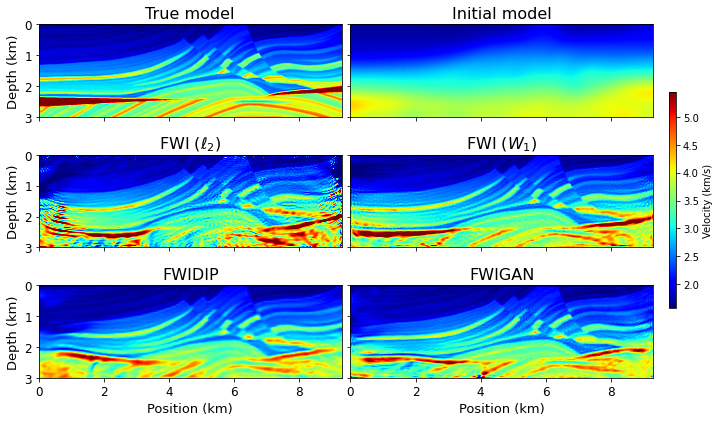

In [6]:
vmin, vmax = np.percentile(model_true/1000, [2,98])
num_cols = 2
num_rows = 3
fig = plt.figure(figsize=(10, 6.))

extent = [0, model_true.shape[1]*dx/1000., model_true.shape[0]*dx/1000., 0]
aspect = 'auto'
for i in range(num_cols*num_rows):
    ax1 = fig.add_subplot(num_rows,num_cols,i+1)
    if i==0:
        ax1.imshow(model_true/1000, extent=extent, aspect=aspect,cmap='jet',
                  vmin=vmin, vmax=vmax)
        ax1.set_title('True model',fontsize=16)
        ax1.set_ylabel('Depth (km)',fontsize=13)
        plt.setp(ax1.get_xticklabels(), visible=False)
        plt.yticks(np.arange(0,3.1,step=1),['0','1','2','3'],fontsize=12)
        
        
    if i==1:
        ax1.imshow(model_init/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('Initial model',fontsize=16)
        plt.setp(ax1.get_xticklabels(), visible=False)
        plt.setp(ax1.get_yticklabels(), visible=False)
    if i==2:
        ax1.imshow(model_l2/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('FWI ($\ell_2$)',fontsize=16)
        #ax[2].set_xlabel('x (km)')
        plt.setp(ax1.get_xticklabels(), visible=False)
        ax1.set_ylabel('Depth (km)',fontsize=13)
        plt.yticks(np.arange(0,3.1,step=1),['0','1','2','3'],fontsize=12)
    if i==3:
        im3 = ax1.imshow(model_w1/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('FWI ($W_1$)',fontsize=16)
        plt.setp(ax1.get_yticklabels(), visible=False)
        plt.setp(ax1.get_xticklabels(), visible=False)
        cax3 = fig.add_axes([0.92, 0.25, 0.01, 0.5])
        
        cbar3 = plt.colorbar(mappable = im3, ax =ax1, cax = cax3, orientation = 'vertical')
        cbar3.set_label('Velocity (km/s)')
    if i==4:
        ax1.imshow(model_dip/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('FWIDIP',fontsize=16)
        ax1.set_xlabel('Position (km)',fontsize=13)
        ax1.set_ylabel('Depth (km)',fontsize=13)
        plt.yticks(np.arange(0,3.1,step=1),['0','1','2','3'],fontsize=12)
        plt.xticks(np.arange(0,9.3,step=2),['0','2','4','6','8'],fontsize=12)
    if i==5:
        ax1.imshow(model_gan/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('FWIGAN',fontsize=16)
        plt.setp(ax1.get_yticklabels(), visible=False)
        ax1.set_xlabel('Position (km)',fontsize=13)
        plt.xticks(np.arange(0,9.3,step=2),['0','2','4','6','8'],fontsize=12)

plt.tight_layout(pad=0.1, h_pad=1, w_pad=0.5, rect=[0, 0, 0.9, 0.95])

foo_fig = plt.gcf()
foo_fig.savefig(ResultPath+str(dataname)+'_rec.eps',format='eps')
plt.show()

In [36]:
p1 = 120
p2 = 170
p3 = 240
vmin1,vmax1 =(model_init[:,p1]/1000).min(), (model_true[:,p1]/1000).max()
vmin2,vmax2 =(model_init[:,p2]/1000).min(), (model_true[:,p2]/1000).max()
vmin3,vmax3 =(model_init[:,p3]/1000).min(), (model_true[:,p3]/1000).max()
print(vmin1,vmax1)
print(vmin2,vmax2)
print(vmin3,vmax3)

1.6653814 5.6214547
1.7549334 4.5181036
1.7242427 5.529383


/tmp/ipykernel_63718/972005854.py:63: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(pad=0.1, h_pad=1, w_pad=0.8, rect=[0, 0, 0.99, 0.99])
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


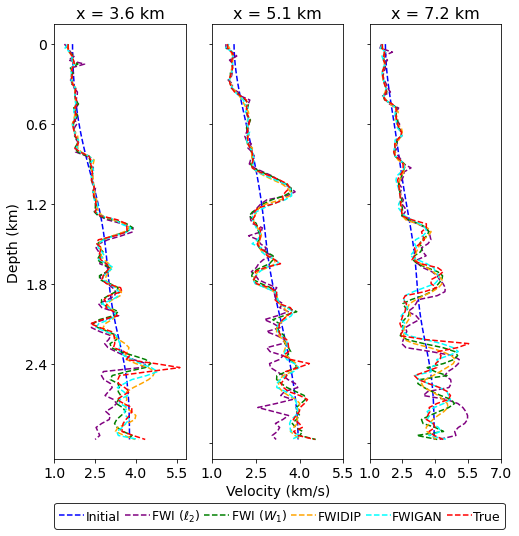

In [38]:
# plot vertical velocity-depth profile
num_cols = 3
num_rows = 1
hgrid = 100
fig = plt.figure(figsize=(8, 8))

for i in range(num_cols*num_rows):
    ax1 = fig.add_subplot(num_rows,num_cols,i+1)
    if i==0:
        line1, = ax1.plot(model_init[:,p1]/1000,np.arange(0,hgrid),color='blue',lw=1.5,ls='--',label='Initial')
        line2, = ax1.plot(model_l2[:,p1]/1000,np.arange(0,hgrid),color='purple',lw=1.5,ls='--',label='FWI ($\ell_2$)')
        line3, = ax1.plot(model_w1[:,p1]/1000,np.arange(0,hgrid),color='green',lw=1.5,ls='--',label='FWI ($W_1$)')
        line4, = ax1.plot(model_dip[:,p1]/1000,np.arange(0,hgrid),color='orange',lw=1.5,ls='--',label='FWIDIP')
        line5, = ax1.plot(model_gan[:,p1]/1000,np.arange(0,hgrid),color='cyan',lw=1.5,ls='--',label='FWIGAN')
        line6, = ax1.plot(model_true[:,p1]/1000,np.arange(0,hgrid),color='red',lw=1.5,ls='--',label='True')
        
        plt.legend(loc='lower left',bbox_to_anchor=(0, -0.16),
                   borderaxespad=0,ncol=6,columnspacing=0.35,handletextpad=0.1,
                   edgecolor='black',fontsize=12.5)
    
        plt.title('x = 3.6 km',fontsize=16)
        ax1.invert_yaxis()
        
        ax1.set_ylabel('Depth (km)',fontsize=14)
        plt.yticks(np.arange(0,hgrid,step=20),['0','0.6','1.2','1.8','2.4'],fontsize=14)
        plt.xticks(np.arange(1.0,6.1,step=1.5),fontsize=14)
    if i==1:
        line1, = ax1.plot(model_init[:,p2]/1000,np.arange(0,hgrid),color='blue',lw=1.5,ls='--',label='Initial')
        line2, = ax1.plot(model_l2[:,p2]/1000,np.arange(0,hgrid),color='purple',lw=1.5,ls='--',label='FWI ($\ell_2$)')
        line3, = ax1.plot(model_w1[:,p2]/1000,np.arange(0,hgrid),color='green',lw=1.5,ls='--',label='FWI ($W_1$)')
        line4, = ax1.plot(model_dip[:,p2]/1000,np.arange(0,hgrid),color='orange',lw=1.5,ls='--',label='FWIDIP')
        line5, = ax1.plot(model_gan[:,p2]/1000,np.arange(0,hgrid),color='cyan',lw=1.5,ls='--',label='FWIGAN')
        line6, = ax1.plot(model_true[:,p2]/1000,np.arange(0,hgrid),color='red',lw=1.5,ls='--',label='True')

        
        ax1.invert_yaxis()
        plt.title('x = 5.1 km',fontsize=16)
        ax1.set_xlabel('Velocity (km/s)',fontsize=14)
        plt.setp(ax1.get_yticklabels(), visible=False)
        plt.xticks(np.arange(1.0,6.1,step=1.5),fontsize=14)
        
    if i==2:
        line1, = ax1.plot(model_init[:,p3]/1000,np.arange(0,hgrid),color='blue',lw=1.5,ls='--',label='Initial')
        line2, = ax1.plot(model_l2[:,p3]/1000,np.arange(0,hgrid),color='purple',lw=1.5,ls='--',label='FWI ($\ell_2$)')
        line3, = ax1.plot(model_w1[:,p3]/1000,np.arange(0,hgrid),color='green',lw=1.5,ls='--',label='FWI ($W_1$)')
        line4, = ax1.plot(model_dip[:,p3]/1000,np.arange(0,hgrid),color='orange',lw=1.5,ls='--',label='FWIDIP')
        line5, = ax1.plot(model_gan[:,p3]/1000,np.arange(0,hgrid),color='cyan',lw=1.5,ls='--',label='FWIGAN')
        line6, = ax1.plot(model_true[:,p3]/1000,np.arange(0,hgrid),color='red',lw=1.5,ls='--',label='True')

        ax1.invert_yaxis()
        plt.title('x = 7.2 km',fontsize=16)
        
        plt.setp(ax1.get_yticklabels(), visible=False)
        plt.xticks(np.arange(21.0,6.1,step=1.5),fontsize=14)
        plt.xticks(np.arange(1.0,7.1,step=1.5),fontsize=14)
plt.tight_layout(pad=0.1, h_pad=1, w_pad=0.8, rect=[0, 0, 0.99, 0.99])

foo_fig = plt.gcf()
foo_fig.savefig(ResultPath+str(dataname)+'_vertical_v.eps',format='eps')
plt.show()


In [39]:
# for noisy case
ResultPath1 = main_dir + 'Comparison/marmousi/noisy/'
# load result of FWIL2

l2file = ResultPath1+'FWIRec_L2.mat'
mat = spio.loadmat(l2file)
model_l2 = np.float32(mat[str('rec')])

# load result of FWIW1
w1file = ResultPath1+'FWIRec_W1.mat'
mat = spio.loadmat(w1file)
model_w1 = np.float32(mat[str('rec')])

# load result of FWIDIP
dipfile = ResultPath1+'DIPRec.mat'
mat = spio.loadmat(dipfile)
model_dip = np.float32(mat[str('rec')])

# load result of FWIGAN
ganfile = ResultPath1+'GANRec.mat'
mat = spio.loadmat(ganfile)
model_gan = np.float32(mat[str('rec')])

In [18]:
l2_ssim = ComputeSSIM(model_l2,model_true)
w1_ssim = ComputeSSIM(model_w1,model_true)
dip_ssim = ComputeSSIM(model_dip,model_true)
gan_ssim = ComputeSSIM(model_gan,model_true)

l2_snr = compare_snr(model_l2,model_true)
w1_snr = compare_snr(model_w1,model_true)
dip_snr = compare_snr(model_dip,model_true)
gan_snr = compare_snr(model_gan,model_true)


l2_err = ComputeRE(model_l2,model_true)
w1_err = ComputeRE(model_w1,model_true)
dip_err = ComputeRE(model_dip,model_true)
gan_err = ComputeRE(model_gan,model_true)

np.savetxt(ResultPath1+'compare_result.txt', 
                           np.hstack((l2_ssim, l2_snr, l2_err,
                                      w1_ssim, w1_snr,w1_err,
                                      dip_ssim, dip_snr,dip_err,
                                      gan_ssim, gan_snr,gan_err)),fmt='%5.4f')

/tmp/ipykernel_63718/1729026175.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.1, h_pad=1, w_pad=0.5, rect=[0, 0, 0.9, 0.95])


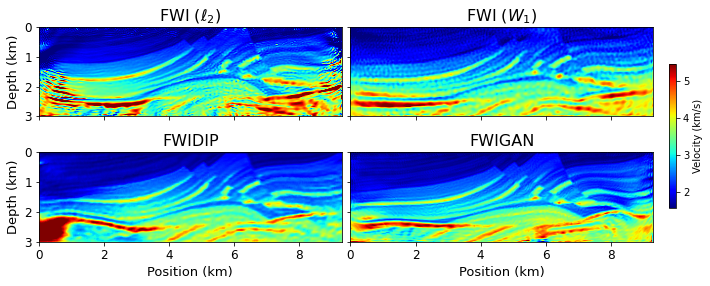

In [21]:
vmin, vmax = np.percentile(model_true/1000, [2,98])
num_cols = 2
num_rows = 2
fig = plt.figure(figsize=(10, 4.))

extent = [0, model_true.shape[1]*dx/1000., model_true.shape[0]*dx/1000., 0]
aspect = 'auto'
for i in range(num_cols*num_rows):
    ax1 = fig.add_subplot(num_rows,num_cols,i+1)
    
    if i==0:
        ax1.imshow(model_l2/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('FWI ($\ell_2$)',fontsize=16)
        
        plt.setp(ax1.get_xticklabels(), visible=False)
        ax1.set_ylabel('Depth (km)',fontsize=13)
        plt.yticks(np.arange(0,3.1,step=1),['0','1','2','3'],fontsize=12)
    if i==1:
        im3 = ax1.imshow(model_w1/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('FWI ($W_1$)',fontsize=16)
        plt.setp(ax1.get_yticklabels(), visible=False)
        plt.setp(ax1.get_xticklabels(), visible=False)
        cax3 = fig.add_axes([0.92, 0.25, 0.01, 0.5])
        
        cbar3 = plt.colorbar(mappable = im3, ax =ax1, cax = cax3, orientation = 'vertical')
        cbar3.set_label('Velocity (km/s)')
    if i==2:
        ax1.imshow(model_dip/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('FWIDIP',fontsize=16)
        ax1.set_xlabel('Position (km)',fontsize=13)
        ax1.set_ylabel('Depth (km)',fontsize=13)
        plt.yticks(np.arange(0,3.1,step=1),['0','1','2','3'],fontsize=12)
        plt.xticks(np.arange(0,9.3,step=2),['0','2','4','6','8'],fontsize=12)
    if i==3:
        ax1.imshow(model_gan/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('FWIGAN',fontsize=16)
        plt.setp(ax1.get_yticklabels(), visible=False)
        ax1.set_xlabel('Position (km)',fontsize=13)
        plt.xticks(np.arange(0,9.3,step=2),['0','2','4','6','8'],fontsize=12)

plt.tight_layout(pad=0.1, h_pad=1, w_pad=0.5, rect=[0, 0, 0.9, 0.95])

foo_fig = plt.gcf()
foo_fig.savefig(ResultPath1+str(dataname)+'_noisy_rec.eps',format='eps')
plt.show()

/tmp/ipykernel_63718/2753969697.py:63: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(pad=0.1, h_pad=1, w_pad=0.8, rect=[0, 0, 0.99, 0.99])
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


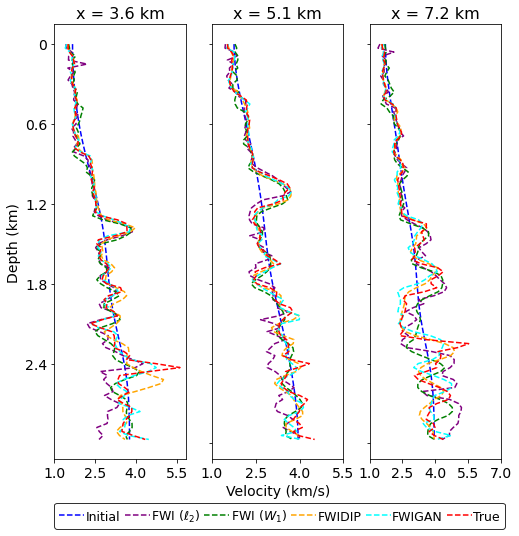

In [40]:
# plot vertical velocity-depth profile
num_cols = 3
num_rows = 1
hgrid = 100
fig = plt.figure(figsize=(8, 8))

for i in range(num_cols*num_rows):
    ax1 = fig.add_subplot(num_rows,num_cols,i+1)
    if i==0:
        line1, = ax1.plot(model_init[:,p1]/1000,np.arange(0,hgrid),color='blue',lw=1.5,ls='--',label='Initial')
        line2, = ax1.plot(model_l2[:,p1]/1000,np.arange(0,hgrid),color='purple',lw=1.5,ls='--',label='FWI ($\ell_2$)')
        line3, = ax1.plot(model_w1[:,p1]/1000,np.arange(0,hgrid),color='green',lw=1.5,ls='--',label='FWI ($W_1$)')
        line4, = ax1.plot(model_dip[:,p1]/1000,np.arange(0,hgrid),color='orange',lw=1.5,ls='--',label='FWIDIP')
        line5, = ax1.plot(model_gan[:,p1]/1000,np.arange(0,hgrid),color='cyan',lw=1.5,ls='--',label='FWIGAN')
        line6, = ax1.plot(model_true[:,p1]/1000,np.arange(0,hgrid),color='red',lw=1.5,ls='--',label='True')
        
        plt.legend(loc='lower left',bbox_to_anchor=(0, -0.16),
                   borderaxespad=0,ncol=6,columnspacing=0.35,handletextpad=0.1,
                   edgecolor='black',fontsize=12.5)       
        
        plt.title('x = 3.6 km',fontsize=16)
        ax1.invert_yaxis()
       
        ax1.set_ylabel('Depth (km)',fontsize=14)
       
        plt.yticks(np.arange(0,hgrid,step=20),['0','0.6','1.2','1.8','2.4'],fontsize=14)
        plt.xticks(np.arange(1.0,6.1,step=1.5),fontsize=14)
    if i==1:
        line1, = ax1.plot(model_init[:,p2]/1000,np.arange(0,hgrid),color='blue',lw=1.5,ls='--',label='Initial')
        line2, = ax1.plot(model_l2[:,p2]/1000,np.arange(0,hgrid),color='purple',lw=1.5,ls='--',label='FWI ($\ell_2$)')
        line3, = ax1.plot(model_w1[:,p2]/1000,np.arange(0,hgrid),color='green',lw=1.5,ls='--',label='FWI ($W_1$)')
        line4, = ax1.plot(model_dip[:,p2]/1000,np.arange(0,hgrid),color='orange',lw=1.5,ls='--',label='FWIDIP')
        line5, = ax1.plot(model_gan[:,p2]/1000,np.arange(0,hgrid),color='cyan',lw=1.5,ls='--',label='FWIGAN')
        line6, = ax1.plot(model_true[:,p2]/1000,np.arange(0,hgrid),color='red',lw=1.5,ls='--',label='True')

        
        ax1.invert_yaxis()
        plt.title('x = 5.1 km',fontsize=16)
        ax1.set_xlabel('Velocity (km/s)',fontsize=14)
        plt.setp(ax1.get_yticklabels(), visible=False)
        plt.xticks(np.arange(1.0,6.1,step=1.5),fontsize=14)
        
    if i==2:
        line1, = ax1.plot(model_init[:,p3]/1000,np.arange(0,hgrid),color='blue',lw=1.5,ls='--',label='Initial')
        line2, = ax1.plot(model_l2[:,p3]/1000,np.arange(0,hgrid),color='purple',lw=1.5,ls='--',label='FWI ($\ell_2$)')
        line3, = ax1.plot(model_w1[:,p3]/1000,np.arange(0,hgrid),color='green',lw=1.5,ls='--',label='FWI ($W_1$)')
        line4, = ax1.plot(model_dip[:,p3]/1000,np.arange(0,hgrid),color='orange',lw=1.5,ls='--',label='FWIDIP')
        line5, = ax1.plot(model_gan[:,p3]/1000,np.arange(0,hgrid),color='cyan',lw=1.5,ls='--',label='FWIGAN')
        line6, = ax1.plot(model_true[:,p3]/1000,np.arange(0,hgrid),color='red',lw=1.5,ls='--',label='True')

        ax1.invert_yaxis()
        plt.title('x = 7.2 km',fontsize=16)
        #ax1.set_xlabel('Velocity (km/s)',fontsize=16)
        plt.setp(ax1.get_yticklabels(), visible=False)
        plt.xticks(np.arange(1.0,7.1,step=1.5),fontsize=14)
        
plt.tight_layout(pad=0.1, h_pad=1, w_pad=0.8, rect=[0, 0, 0.99, 0.99])
#plt.tight_layout()
foo_fig = plt.gcf()
foo_fig.savefig(ResultPath1+str(dataname)+'_noisy_vertical_v.eps',format='eps')
plt.show()


In [28]:
# load data with absorb surface
datafile1 = ResultPath+str(dataname)+'_rcv_amps_absorb.mat'
model_mat = spio.loadmat(datafile1)
data_absorb1 = np.float32(model_mat[str('true')])

# load data with free surface

datafile2 = ResultPath+str(dataname)+'_rcv_amps.mat'
model_mat = spio.loadmat(datafile2)
data_free1 = np.float32(model_mat[str('true')])

# load data with free surface and AWGN
datafile3 = ResultPath+str(dataname)+'_noisercv_amps.mat'
model_mat = spio.loadmat(datafile3)
data_noise1 = np.float32(model_mat[str('true')])

/tmp/ipykernel_56453/1905220768.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.1, h_pad=0.2, w_pad=0.5, rect=[0, 0, 0.9, 0.95])


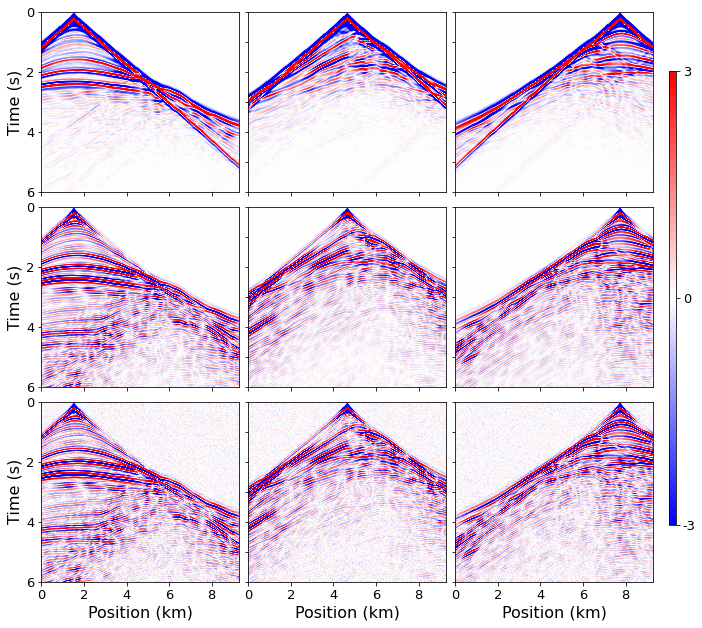

In [34]:

data_absorb = (data_absorb1)
data_free = (data_free1)
data_noise = (data_noise1)

vmin, vmax = -3, 3 #np.percentile(data_clean[:,6], [2,98]) 
num_cols = 3
num_rows = 3
fig = plt.figure(figsize=(10, 9))
plt.rc({'font.size': 20})
extent = [0, data_absorb.shape[2]*dx/1000, data_absorb.shape[0]*dt, 0]
aspect = 'auto'

for i in range(num_cols*num_rows):
    ax1 = fig.add_subplot(num_rows,num_cols,i+1)
    if i==0:
        ax1.imshow(data_absorb[:,4], extent=extent, aspect=aspect,cmap='bwr',
                  vmin=vmin, vmax=vmax)
        #ax1.set_title('True model')
        ax1.set_ylabel('Time (s)',fontsize=16)
        plt.setp(ax1.get_xticklabels(), visible=False)
        plt.yticks(np.arange(0,6.1,step=2.),['0','2','4','6'],fontsize=13)
    if i==1:
        ax1.imshow(data_absorb[:,14], extent=extent, aspect=aspect,cmap='bwr',
                  vmin=vmin, vmax=vmax)
        
        plt.setp(ax1.get_yticklabels(), visible=False)
        plt.setp(ax1.get_xticklabels(), visible=False)
    if i==2:
        im2 = ax1.imshow(data_absorb[:,24], extent=extent, aspect=aspect,cmap='bwr',
                  vmin=vmin, vmax=vmax)
    
        plt.setp(ax1.get_xticklabels(), visible=False)
        plt.setp(ax1.get_yticklabels(), visible=False)
        cax2 = fig.add_axes([0.92, 0.15, 0.01, 0.7])
        
        cbar3 =plt.colorbar(mappable = im2, ax =ax1, cax = cax2,orientation = 'vertical',ticks=[vmin, 0, vmax])
        #cbar3.set_label('Velocity (km/s)')
        cbar3.ax.set_yticklabels(['-3', '0', '3'],fontsize=13)
    if i==3:
        ax1.imshow(data_free[:,4], extent=extent, aspect=aspect,cmap='bwr',
                  vmin=vmin, vmax=vmax)
        ax1.set_ylabel('Time (s)',fontsize=16)
        
        plt.setp(ax1.get_xticklabels(), visible=False)
        plt.yticks(np.arange(0,6.1,step=2.),['0','2','4','6'],fontsize=13)
    if i==4:
        ax1.imshow(data_free[:,14], extent=extent, aspect=aspect,cmap='bwr',
                  vmin=vmin, vmax=vmax)
        plt.setp(ax1.get_yticklabels(), visible=False)
        plt.setp(ax1.get_xticklabels(), visible=False)
    if i==5:
        im2 = ax1.imshow(data_free[:,24], extent=extent, aspect=aspect,cmap='bwr',
                  vmin=vmin, vmax=vmax)
        plt.setp(ax1.get_xticklabels(), visible=False)
        plt.setp(ax1.get_yticklabels(), visible=False)
    if i==6:
        ax1.imshow(data_noise[:,4], extent=extent, aspect=aspect,cmap='bwr',
                  vmin=vmin, vmax=vmax)
        ax1.set_ylabel('Time (s)',fontsize=16)
        plt.xticks(np.arange(0,9.3,step=2),['0','2','4','6','8'],fontsize=13)
        plt.yticks(np.arange(0,6.1,step=2.),['0','2','4','6'],fontsize=13)
        ax1.set_xlabel('Position (km)',fontsize=16)
    if i==7:
        ax1.imshow(data_noise[:,14], extent=extent, aspect=aspect,cmap='bwr',
                  vmin=vmin, vmax=vmax)
       
        ax1.set_xlabel('Position (km)',fontsize=16)
        plt.setp(ax1.get_yticklabels(), visible=False)
        plt.xticks(np.arange(0,9.3,step=2),['0','2','4','6','8'],fontsize=13)
    if i==8:
        im2=ax1.imshow(data_noise[:,24], extent=extent, aspect=aspect,cmap='bwr',
                  vmin=vmin, vmax=vmax)
        plt.xticks(np.arange(0,9.3,step=2),['0','2','4','6','8'],fontsize=13)
        plt.setp(ax1.get_yticklabels(), visible=False)
        ax1.set_xlabel('Position (km)',fontsize=16)
plt.tight_layout(pad=0.1, h_pad=0.2, w_pad=0.5, rect=[0, 0, 0.9, 0.95])

foo_fig = plt.gcf()
foo_fig.savefig(ResultPath+str(dataname)+'_rcv.eps',format='eps')
plt.show()

In [ ]:
# for overthrust model

In [1]:
import numpy as np
from PathConfig import *
from ParamConfig import *
import scipy.io as spio
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# load true model
model_true = (np.fromfile(data_path, np.float32).reshape(vmodel_dim[1],vmodel_dim[0]))
model_true = np.transpose(model_true,(1,0))

In [3]:
# load initial model of marmousi
ResultPath = main_dir + 'Comparison/overthrust/'
initfile = ResultPath+str(dataname)+'_initmodel.mat'
model_mat = spio.loadmat(initfile)
model_init = np.float32(model_mat[str('initmodel')])

In [32]:
# load result of FWIL2
l2file = ResultPath+'FWIRec_L2.mat'
mat = spio.loadmat(l2file)
model_l2 = np.float32(mat[str('rec')])

# load result of FWIW1
w1file = ResultPath+'FWIRec_W1.mat'
mat = spio.loadmat(w1file)
model_w1 = np.float32(mat[str('rec')])

# load result of FWIDIP
dipfile = ResultPath+'DIPRec.mat'
mat = spio.loadmat(dipfile)
model_dip = np.float32(mat[str('rec')])

# load result of FWIGAN
ganfile = ResultPath+'GANRec.mat'
mat = spio.loadmat(ganfile)
model_gan = np.float32(mat[str('rec')])

In [5]:
def compare_snr(img_test, img_true):
    return 20 * np.log10(np.linalg.norm(img_true.flatten()) / np.linalg.norm(img_true.flatten() - img_test.flatten()))
from utils.utils import ComputeSSIM,ComputeRE
l2_ssim = ComputeSSIM(model_l2,model_true)
w1_ssim = ComputeSSIM(model_w1,model_true)
dip_ssim = ComputeSSIM(model_dip,model_true)
gan_ssim = ComputeSSIM(model_gan,model_true)

l2_snr = compare_snr(model_l2,model_true)
w1_snr = compare_snr(model_w1,model_true)
dip_snr = compare_snr(model_dip,model_true)
gan_snr = compare_snr(model_gan,model_true)


l2_err = ComputeRE(model_l2,model_true)
w1_err = ComputeRE(model_w1,model_true)
dip_err = ComputeRE(model_dip,model_true)
gan_err = ComputeRE(model_gan,model_true)

np.savetxt(ResultPath+'compare_result.txt', 
                           np.hstack((l2_ssim, l2_snr, l2_err,
                                      w1_ssim, w1_snr,w1_err,
                                      dip_ssim, dip_snr,dip_err,
                                      gan_ssim, gan_snr,gan_err)),fmt='%5.4f')

/tmp/ipykernel_63448/140656059.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.1, h_pad=1, w_pad=0.1, rect=[0, 0, 0.91, 0.95])


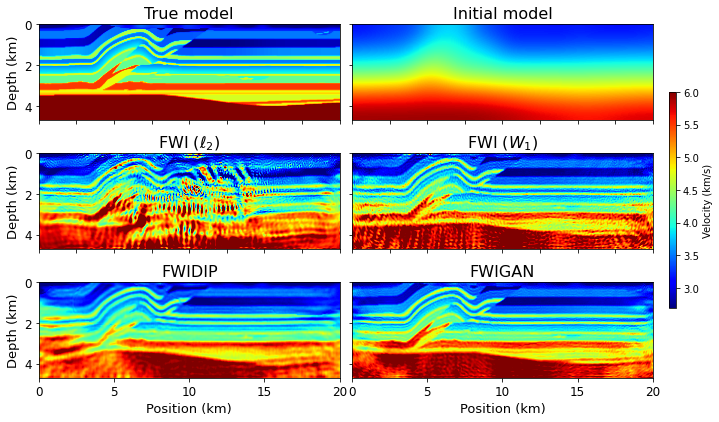

In [9]:
vmin, vmax = np.percentile(model_true/1000, [2,98])
num_cols = 2
num_rows = 3
fig = plt.figure(figsize=(10, 6.))

extent = [0, model_true.shape[1]*dx/1000., model_true.shape[0]*dx/1000., 0]
aspect = 'auto'
for i in range(num_cols*num_rows):
    ax1 = fig.add_subplot(num_rows,num_cols,i+1)
    if i==0:
        ax1.imshow(model_true/1000, extent=extent, aspect=aspect,cmap='jet',
                  vmin=vmin, vmax=vmax)
        ax1.set_title('True model',fontsize=16)
        ax1.set_ylabel('Depth (km)',fontsize=13)
        plt.setp(ax1.get_xticklabels(), visible=False)
        plt.yticks(np.arange(0,4.7,step=2),['0','2','4'],fontsize=12)
        
        
    if i==1:
        ax1.imshow(model_init/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('Initial model',fontsize=16)
        plt.setp(ax1.get_xticklabels(), visible=False)
        plt.setp(ax1.get_yticklabels(), visible=False)
    if i==2:
        ax1.imshow(model_l2/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('FWI ($\ell_2$)',fontsize=16)
        
        plt.setp(ax1.get_xticklabels(), visible=False)
        ax1.set_ylabel('Depth (km)',fontsize=13)
        plt.yticks(np.arange(0,4.7,step=2),['0','2','4'],fontsize=12)
    if i==3:
        im3 = ax1.imshow(model_w1/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('FWI ($W_1$)',fontsize=16)
        plt.setp(ax1.get_yticklabels(), visible=False)
        plt.setp(ax1.get_xticklabels(), visible=False)
        cax3 = fig.add_axes([0.92, 0.25, 0.01, 0.5])
       
        cbar3 = plt.colorbar(mappable = im3, ax =ax1, cax = cax3, orientation = 'vertical')
        cbar3.set_label('Velocity (km/s)')
    if i==4:
        ax1.imshow(model_dip/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('FWIDIP',fontsize=16)
        ax1.set_xlabel('Position (km)',fontsize=13)
        ax1.set_ylabel('Depth (km)',fontsize=13)
        plt.yticks(np.arange(0,4.7,step=2),['0','2','4'],fontsize=12)
        plt.xticks(np.arange(0,21.,step=5),['0','5','10','15','20'],fontsize=12)
    if i==5:
        ax1.imshow(model_gan/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('FWIGAN',fontsize=16)
        plt.setp(ax1.get_yticklabels(), visible=False)
        ax1.set_xlabel('Position (km)',fontsize=13)
        plt.xticks(np.arange(0,21.,step=5),['0','5','10','15','20'],fontsize=12)

plt.tight_layout(pad=0.1, h_pad=1, w_pad=0.1, rect=[0, 0, 0.91, 0.95])
foo_fig = plt.gcf()
foo_fig.savefig(ResultPath+str(dataname)+'_rec.eps',format='eps')
plt.show()

In [33]:
p1 = 100
p2 = 200
p3 = 300
vmin1,vmax1 =(model_init[:,p1]/1000).min(), (model_true[:,p1]/1000).max()
vmin2,vmax2 =(model_init[:,p2]/1000).min(), (model_true[:,p2]/1000).max()
vmin3,vmax3 =(model_init[:,p3]/1000).min(), (model_true[:,p3]/1000).max()
print(vmin1,vmax1)
print(vmin2,vmax2)
print(vmin3,vmax3)

3.6211107 6.0
3.256313 6.0
3.1883614 6.0


/tmp/ipykernel_63448/1188046894.py:63: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(pad=0.1, h_pad=1, w_pad=0.8, rect=[0, 0, 0.99, 0.99])
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


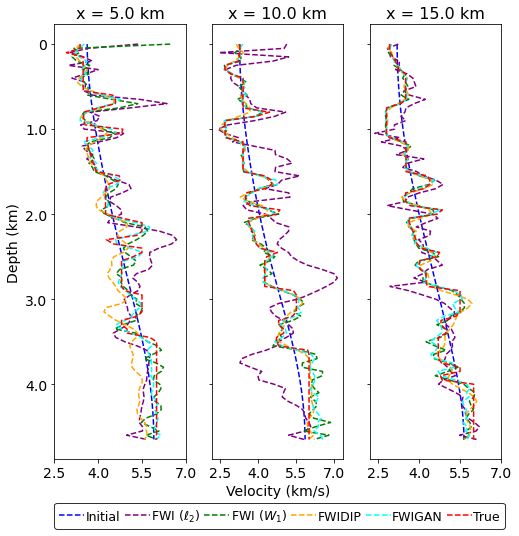

In [34]:
# plot vertical velocity-depth profile
num_cols = 3
num_rows = 1
hgrid = 94
fig = plt.figure(figsize=(8, 8))

for i in range(num_cols*num_rows):
    ax1 = fig.add_subplot(num_rows,num_cols,i+1)
    if i==0:
        line1, = ax1.plot(model_init[:,p1]/1000,np.arange(0,hgrid),color='blue',lw=1.5,ls='--',label='Initial')
        line2, = ax1.plot(model_l2[:,p1]/1000,np.arange(0,hgrid),color='purple',lw=1.5,ls='--',label='FWI ($\ell_2$)')
        line3, = ax1.plot(model_w1[:,p1]/1000,np.arange(0,hgrid),color='green',lw=1.5,ls='--',label='FWI ($W_1$)')
        line4, = ax1.plot(model_dip[:,p1]/1000,np.arange(0,hgrid),color='orange',lw=1.5,ls='--',label='FWIDIP')
        line5, = ax1.plot(model_gan[:,p1]/1000,np.arange(0,hgrid),color='cyan',lw=1.5,ls='--',label='FWIGAN')
        line6, = ax1.plot(model_true[:,p1]/1000,np.arange(0,hgrid),color='red',lw=1.5,ls='--',label='True')
        
        plt.legend(loc='lower left',bbox_to_anchor=(0, -0.16),
                   borderaxespad=0,ncol=6,columnspacing=0.35,handletextpad=0.1,
                   edgecolor='black',fontsize=12.5)
       
        plt.title('x = 5.0 km',fontsize=16)
        ax1.invert_yaxis()
        
        ax1.set_ylabel('Depth (km)',fontsize=14)
        plt.yticks(np.arange(0,hgrid,step=20),['0','1.0','2.0','3.0','4.0'],fontsize=14)
        plt.xticks(np.arange(2.5,7.1,step=1.5),fontsize=14)
    if i==1:
        line1, = ax1.plot(model_init[:,p2]/1000,np.arange(0,hgrid),color='blue',lw=1.5,ls='--',label='Initial')
        line2, = ax1.plot(model_l2[:,p2]/1000,np.arange(0,hgrid),color='purple',lw=1.5,ls='--',label='FWI ($\ell_2$)')
        line3, = ax1.plot(model_w1[:,p2]/1000,np.arange(0,hgrid),color='green',lw=1.5,ls='--',label='FWI ($W_1$)')
        line4, = ax1.plot(model_dip[:,p2]/1000,np.arange(0,hgrid),color='orange',lw=1.5,ls='--',label='FWIDIP')
        line5, = ax1.plot(model_gan[:,p2]/1000,np.arange(0,hgrid),color='cyan',lw=1.5,ls='--',label='FWIGAN')
        line6, = ax1.plot(model_true[:,p2]/1000,np.arange(0,hgrid),color='red',lw=1.5,ls='--',label='True')
        ax1.invert_yaxis()
        plt.title('x = 10.0 km',fontsize=16)
        ax1.set_xlabel('Velocity (km/s)',fontsize=14)
        plt.setp(ax1.get_yticklabels(), visible=False)
        plt.xticks(np.arange(2.5,7.1,step=1.5),fontsize=14)
        
    if i==2:
        line1, = ax1.plot(model_init[:,p3]/1000,np.arange(0,hgrid),color='blue',lw=1.5,ls='--',label='Initial')
        line2, = ax1.plot(model_l2[:,p3]/1000,np.arange(0,hgrid),color='purple',lw=1.5,ls='--',label='FWI ($\ell_2$)')
        line3, = ax1.plot(model_w1[:,p3]/1000,np.arange(0,hgrid),color='green',lw=1.5,ls='--',label='FWI ($W_1$)')
        line4, = ax1.plot(model_dip[:,p3]/1000,np.arange(0,hgrid),color='orange',lw=1.5,ls='--',label='FWIDIP')
        line5, = ax1.plot(model_gan[:,p3]/1000,np.arange(0,hgrid),color='cyan',lw=1.5,ls='--',label='FWIGAN')
        line6, = ax1.plot(model_true[:,p3]/1000,np.arange(0,hgrid),color='red',lw=1.5,ls='--',label='True')

        ax1.invert_yaxis()
        plt.title('x = 15.0 km',fontsize=16)
        plt.setp(ax1.get_yticklabels(), visible=False)
        plt.xticks(np.arange(2.5,7.1,step=1.5),fontsize=14)
        
plt.tight_layout(pad=0.1, h_pad=1, w_pad=0.8, rect=[0, 0, 0.99, 0.99])
foo_fig = plt.gcf()
foo_fig.savefig(ResultPath+str(dataname)+'_vertical_v.eps',format='eps')
plt.show()


In [36]:
# for noisy case
ResultPath1 = main_dir + 'Comparison/overthrust/noisy/'
# load result of FWIL2

l2file = ResultPath1+'FWIRec_L2.mat'
mat = spio.loadmat(l2file)
model_l2 = np.float32(mat[str('rec')])

# load result of FWIW1
w1file = ResultPath1+'FWIRec_W1.mat'
mat = spio.loadmat(w1file)
model_w1 = np.float32(mat[str('rec')])

# load result of FWIDIP
dipfile = ResultPath1+'DIPRec.mat'
mat = spio.loadmat(dipfile)
model_dip = np.float32(mat[str('rec')])

# load result of FWIGAN
ganfile = ResultPath1+'GANRec.mat'
mat = spio.loadmat(ganfile)
model_gan = np.float32(mat[str('rec')])

In [16]:
l2_ssim = ComputeSSIM(model_l2,model_true)
w1_ssim = ComputeSSIM(model_w1,model_true)
dip_ssim = ComputeSSIM(model_dip,model_true)
gan_ssim = ComputeSSIM(model_gan,model_true)

l2_snr = compare_snr(model_l2,model_true)
w1_snr = compare_snr(model_w1,model_true)
dip_snr = compare_snr(model_dip,model_true)
gan_snr = compare_snr(model_gan,model_true)


l2_err = ComputeRE(model_l2,model_true)
w1_err = ComputeRE(model_w1,model_true)
dip_err = ComputeRE(model_dip,model_true)
gan_err = ComputeRE(model_gan,model_true)

np.savetxt(ResultPath1+'compare_result.txt', 
                           np.hstack((l2_ssim, l2_snr, l2_err,
                                      w1_ssim, w1_snr,w1_err,
                                      dip_ssim, dip_snr,dip_err,
                                      gan_ssim, gan_snr,gan_err)),fmt='%5.4f')

/tmp/ipykernel_63448/2324316310.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.1, h_pad=1, w_pad=0.1, rect=[0, 0, 0.91, 0.95])


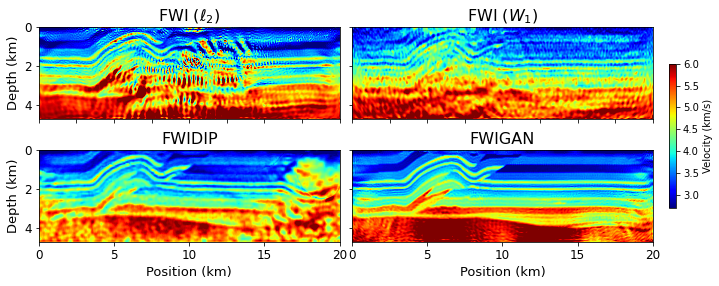

In [17]:
vmin, vmax = np.percentile(model_true/1000, [2,98])
num_cols = 2
num_rows = 2
fig = plt.figure(figsize=(10, 4.))

extent = [0, model_true.shape[1]*dx/1000., model_true.shape[0]*dx/1000., 0]
aspect = 'auto'
for i in range(num_cols*num_rows):
    ax1 = fig.add_subplot(num_rows,num_cols,i+1)
    if i==0:
        ax1.imshow(model_l2/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('FWI ($\ell_2$)',fontsize=16)
        plt.setp(ax1.get_xticklabels(), visible=False)
        ax1.set_ylabel('Depth (km)',fontsize=13)
        plt.yticks(np.arange(0,4.7,step=2),['0','2','4'],fontsize=12)
    if i==1:
        im3 = ax1.imshow(model_w1/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('FWI ($W_1$)',fontsize=16)
        plt.setp(ax1.get_yticklabels(), visible=False)
        plt.setp(ax1.get_xticklabels(), visible=False)
        cax3 = fig.add_axes([0.92, 0.25, 0.01, 0.5])
        cbar3 = plt.colorbar(mappable = im3, ax =ax1, cax = cax3, orientation = 'vertical')
        cbar3.set_label('Velocity (km/s)')
    if i==2:
        ax1.imshow(model_dip/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('FWIDIP',fontsize=16)
        ax1.set_xlabel('Position (km)',fontsize=13)
        ax1.set_ylabel('Depth (km)',fontsize=13)
        plt.yticks(np.arange(0,4.7,step=2),['0','2','4'],fontsize=12)
        plt.xticks(np.arange(0,21.,step=5),['0','5','10','15','20'],fontsize=12)
    if i==3:
        ax1.imshow(model_gan/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('FWIGAN',fontsize=16)
        plt.setp(ax1.get_yticklabels(), visible=False)
        ax1.set_xlabel('Position (km)',fontsize=13)
        plt.xticks(np.arange(0,21.,step=5),['0','5','10','15','20'],fontsize=12)

plt.tight_layout(pad=0.1, h_pad=1, w_pad=0.1, rect=[0, 0, 0.91, 0.95])

foo_fig = plt.gcf()
foo_fig.savefig(ResultPath1+str(dataname)+'_noisy_rec.eps',format='eps')
plt.show()

/tmp/ipykernel_63448/901339394.py:63: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(pad=0.1, h_pad=1, w_pad=0.8, rect=[0, 0, 0.99, 0.99])
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


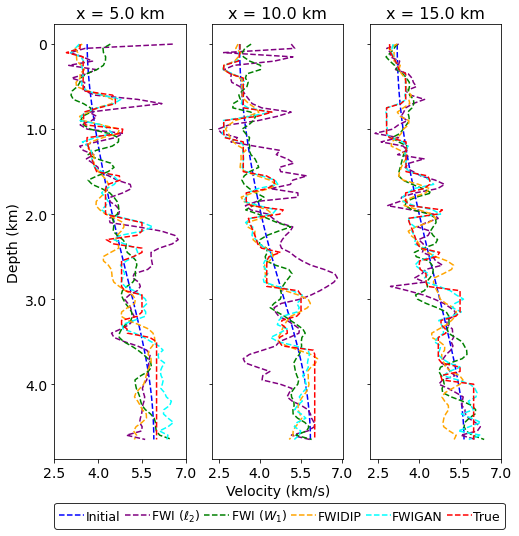

In [37]:
# plot vertical velocity-depth profile
num_cols = 3
num_rows = 1
hgrid = 94
fig = plt.figure(figsize=(8, 8))

for i in range(num_cols*num_rows):
    ax1 = fig.add_subplot(num_rows,num_cols,i+1)
    if i==0:
        line1, = ax1.plot(model_init[:,p1]/1000,np.arange(0,hgrid),color='blue',lw=1.5,ls='--',label='Initial')
        line2, = ax1.plot(model_l2[:,p1]/1000,np.arange(0,hgrid),color='purple',lw=1.5,ls='--',label='FWI ($\ell_2$)')
        line3, = ax1.plot(model_w1[:,p1]/1000,np.arange(0,hgrid),color='green',lw=1.5,ls='--',label='FWI ($W_1$)')
        line4, = ax1.plot(model_dip[:,p1]/1000,np.arange(0,hgrid),color='orange',lw=1.5,ls='--',label='FWIDIP')
        line5, = ax1.plot(model_gan[:,p1]/1000,np.arange(0,hgrid),color='cyan',lw=1.5,ls='--',label='FWIGAN')
        line6, = ax1.plot(model_true[:,p1]/1000,np.arange(0,hgrid),color='red',lw=1.5,ls='--',label='True')
        
        plt.legend(loc='lower left',bbox_to_anchor=(0, -0.16),
                   borderaxespad=0,ncol=6,columnspacing=0.35,handletextpad=0.1,
                   edgecolor='black',fontsize=12.5)
       
        plt.title('x = 5.0 km',fontsize=16)
        ax1.invert_yaxis()
        
        ax1.set_ylabel('Depth (km)',fontsize=14)
        plt.yticks(np.arange(0,hgrid,step=20),['0','1.0','2.0','3.0','4.0'],fontsize=14)
        plt.xticks(np.arange(2.5,7.1,step=1.5),fontsize=14)
    if i==1:
        line1, = ax1.plot(model_init[:,p2]/1000,np.arange(0,hgrid),color='blue',lw=1.5,ls='--',label='Initial')
        line2, = ax1.plot(model_l2[:,p2]/1000,np.arange(0,hgrid),color='purple',lw=1.5,ls='--',label='FWI ($\ell_2$)')
        line3, = ax1.plot(model_w1[:,p2]/1000,np.arange(0,hgrid),color='green',lw=1.5,ls='--',label='FWI ($W_1$)')
        line4, = ax1.plot(model_dip[:,p2]/1000,np.arange(0,hgrid),color='orange',lw=1.5,ls='--',label='FWIDIP')
        line5, = ax1.plot(model_gan[:,p2]/1000,np.arange(0,hgrid),color='cyan',lw=1.5,ls='--',label='FWIGAN')
        line6, = ax1.plot(model_true[:,p2]/1000,np.arange(0,hgrid),color='red',lw=1.5,ls='--',label='True')
        ax1.invert_yaxis()
        plt.title('x = 10.0 km',fontsize=16)
        ax1.set_xlabel('Velocity (km/s)',fontsize=14)
        plt.setp(ax1.get_yticklabels(), visible=False)
        plt.xticks(np.arange(2.5,7.1,step=1.5),fontsize=14)
        
    if i==2:
        line1, = ax1.plot(model_init[:,p3]/1000,np.arange(0,hgrid),color='blue',lw=1.5,ls='--',label='Initial')
        line2, = ax1.plot(model_l2[:,p3]/1000,np.arange(0,hgrid),color='purple',lw=1.5,ls='--',label='FWI ($\ell_2$)')
        line3, = ax1.plot(model_w1[:,p3]/1000,np.arange(0,hgrid),color='green',lw=1.5,ls='--',label='FWI ($W_1$)')
        line4, = ax1.plot(model_dip[:,p3]/1000,np.arange(0,hgrid),color='orange',lw=1.5,ls='--',label='FWIDIP')
        line5, = ax1.plot(model_gan[:,p3]/1000,np.arange(0,hgrid),color='cyan',lw=1.5,ls='--',label='FWIGAN')
        line6, = ax1.plot(model_true[:,p3]/1000,np.arange(0,hgrid),color='red',lw=1.5,ls='--',label='True')

        ax1.invert_yaxis()
        plt.title('x = 15.0 km',fontsize=16)
        plt.setp(ax1.get_yticklabels(), visible=False)
        plt.xticks(np.arange(2.5,7.1,step=1.5),fontsize=14)
        
plt.tight_layout(pad=0.1, h_pad=1, w_pad=0.8, rect=[0, 0, 0.99, 0.99])
foo_fig = plt.gcf()
foo_fig.savefig(ResultPath1+str(dataname)+'_noisy_vertical_v.eps',format='eps')
plt.show()


In [1]:
import numpy as np
from PathConfig import *
from ParamConfig import *
import scipy.io as spio
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# load true model
model_true = (np.fromfile(data_path, np.float32).reshape(vmodel_dim[1],vmodel_dim[0]))
model_true = np.transpose(model_true,(1,0))

In [40]:
# load initial model of marmousi
ResultPath = main_dir + 'Comparison/marmousi2/'
initfile = ResultPath+str(dataname)+'_initmodel.mat'
model_mat = spio.loadmat(initfile)
model_init = np.float32(model_mat[str('initmodel')])

In [41]:
# load result of FWIL2
l2file = ResultPath+'FWIRec_L2.mat'
mat = spio.loadmat(l2file)
model_l2 = np.float32(mat[str('rec')])

# load result of FWIW1
w1file = ResultPath+'FWIRec_W1.mat'
mat = spio.loadmat(w1file)
model_w1 = np.float32(mat[str('rec')])

# load result of FWIDIP
dipfile = ResultPath+'DIPRec.mat'
mat = spio.loadmat(dipfile)
model_dip = np.float32(mat[str('rec')])

# load result of FWIGAN
ganfile = ResultPath+'GANRec.mat'
mat = spio.loadmat(ganfile)
model_gan = np.float32(mat[str('rec')])

In [6]:
def compare_snr(img_test, img_true):
    return 20 * np.log10(np.linalg.norm(img_true.flatten()) / np.linalg.norm(img_true.flatten() - img_test.flatten()))
from utils.utils import ComputeSSIM,ComputeRE
l2_ssim = ComputeSSIM(model_l2,model_true)
w1_ssim = ComputeSSIM(model_w1,model_true)
dip_ssim = ComputeSSIM(model_dip,model_true)
gan_ssim = ComputeSSIM(model_gan,model_true)

l2_snr = compare_snr(model_l2,model_true)
w1_snr = compare_snr(model_w1,model_true)
dip_snr = compare_snr(model_dip,model_true)
gan_snr = compare_snr(model_gan,model_true)


l2_err = ComputeRE(model_l2,model_true)
w1_err = ComputeRE(model_w1,model_true)
dip_err = ComputeRE(model_dip,model_true)
gan_err = ComputeRE(model_gan,model_true)

np.savetxt(ResultPath+'compare_result.txt', 
                           np.hstack((l2_ssim, l2_snr, l2_err,
                                      w1_ssim, w1_snr,w1_err,
                                      dip_ssim, dip_snr,dip_err,
                                      gan_ssim, gan_snr,gan_err)),fmt='%5.4f')

/tmp/ipykernel_61143/3149969434.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.1, h_pad=1, w_pad=0.5, rect=[0, 0, 0.9, 0.95])


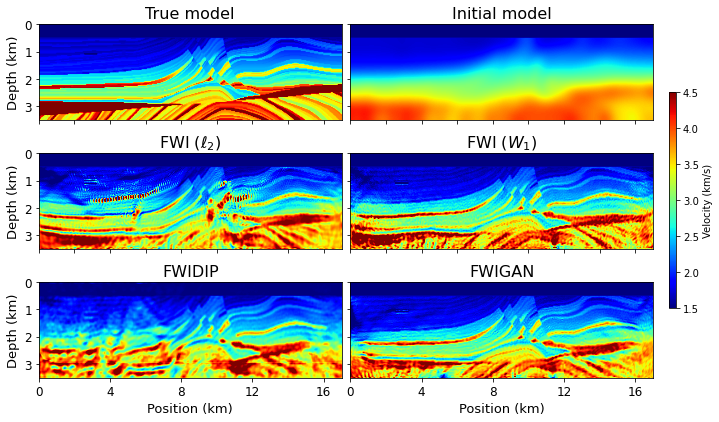

In [7]:
vmin, vmax = np.percentile(model_true/1000, [2,98])
num_cols = 2
num_rows = 3
fig = plt.figure(figsize=(10, 6.))

extent = [0, model_true.shape[1]*dx/1000., model_true.shape[0]*dx/1000., 0]
aspect = 'auto'
for i in range(num_cols*num_rows):
    ax1 = fig.add_subplot(num_rows,num_cols,i+1)
    if i==0:
        ax1.imshow(model_true/1000, extent=extent, aspect=aspect,cmap='jet',
                  vmin=vmin, vmax=vmax)
        ax1.set_title('True model',fontsize=16)
        ax1.set_ylabel('Depth (km)',fontsize=13)
        plt.setp(ax1.get_xticklabels(), visible=False)
        plt.yticks(np.arange(0,3.6,step=1),['0','1','2','3'],fontsize=12)
        
        
    if i==1:
        ax1.imshow(model_init/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('Initial model',fontsize=16)
        plt.setp(ax1.get_xticklabels(), visible=False)
        plt.setp(ax1.get_yticklabels(), visible=False)
    if i==2:
        ax1.imshow(model_l2/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('FWI ($\ell_2$)',fontsize=16)
        #ax[2].set_xlabel('x (km)')
        plt.setp(ax1.get_xticklabels(), visible=False)
        ax1.set_ylabel('Depth (km)',fontsize=13)
        plt.yticks(np.arange(0,3.6,step=1),['0','1','2','3'],fontsize=12)
    if i==3:
        im3 = ax1.imshow(model_w1/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('FWI ($W_1$)',fontsize=16)
        plt.setp(ax1.get_yticklabels(), visible=False)
        plt.setp(ax1.get_xticklabels(), visible=False)
        cax3 = fig.add_axes([0.92, 0.25, 0.01, 0.5])
        
        cbar3 = plt.colorbar(mappable = im3, ax =ax1, cax = cax3, orientation = 'vertical')
        cbar3.set_label('Velocity (km/s)')
    if i==4:
        ax1.imshow(model_dip/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('FWIDIP',fontsize=16)
        ax1.set_xlabel('Position (km)',fontsize=13)
        ax1.set_ylabel('Depth (km)',fontsize=13)
        plt.yticks(np.arange(0,3.6,step=1),['0','1','2','3'],fontsize=12)
        plt.xticks(np.arange(0,17,step=4),['0','4','8','12','16'],fontsize=12)
    if i==5:
        ax1.imshow(model_gan/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('FWIGAN',fontsize=16)
        plt.setp(ax1.get_yticklabels(), visible=False)
        ax1.set_xlabel('Position (km)',fontsize=13)
        plt.xticks(np.arange(0,17,step=4),['0','4','8','12','16'],fontsize=12)
plt.tight_layout(pad=0.1, h_pad=1, w_pad=0.5, rect=[0, 0, 0.9, 0.95])
foo_fig = plt.gcf()
foo_fig.savefig(ResultPath+str(dataname)+'_rec.eps',format='eps')
plt.show()

In [42]:
p1 = 140
p2 = 280
p3 = 420
vmin1,vmax1 =(model_init[:,p1]/1000).min(), (model_true[:,p1]/1000).max()
vmin2,vmax2 =(model_init[:,p2]/1000).min(), (model_true[:,p2]/1000).max()
vmin3,vmax3 =(model_init[:,p3]/1000).min(), (model_true[:,p3]/1000).max()
print(vmin1,vmax1)
print(vmin2,vmax2)
print(vmin3,vmax3)

1.5 4.55
1.5 4.67
1.5 4.7


/tmp/ipykernel_61143/1574707791.py:73: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(pad=0.1, h_pad=1, w_pad=0.8, rect=[0, 0, 0.99, 0.99])
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


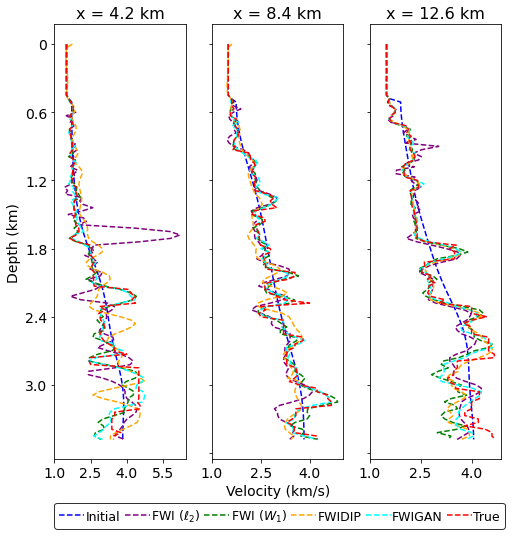

In [44]:
# plot vertical velocity-depth profile
num_cols = 3
num_rows = 1
hgrid = 117
fig = plt.figure(figsize=(8, 8))

for i in range(num_cols*num_rows):
    ax1 = fig.add_subplot(num_rows,num_cols,i+1)
    if i==0:
        line1, = ax1.plot(model_init[:,p1]/1000,np.arange(0,hgrid),color='blue',lw=1.5,ls='--',label='Initial')
        line2, = ax1.plot(model_l2[:,p1]/1000,np.arange(0,hgrid),color='purple',lw=1.5,ls='--',label='FWI ($\ell_2$)')
        line3, = ax1.plot(model_w1[:,p1]/1000,np.arange(0,hgrid),color='green',lw=1.5,ls='--',label='FWI ($W_1$)')
        line4, = ax1.plot(model_dip[:,p1]/1000,np.arange(0,hgrid),color='orange',lw=1.5,ls='--',label='FWIDIP')
        line5, = ax1.plot(model_gan[:,p1]/1000,np.arange(0,hgrid),color='cyan',lw=1.5,ls='--',label='FWIGAN')
        line6, = ax1.plot(model_true[:,p1]/1000,np.arange(0,hgrid),color='red',lw=1.5,ls='--',label='True')
        
        plt.legend(loc='lower left',bbox_to_anchor=(0, -0.16),
                   borderaxespad=0,ncol=6,columnspacing=0.35,handletextpad=0.1,
                   edgecolor='black',fontsize=12.5)
       
        plt.title('x = 4.2 km',fontsize=16)
        ax1.invert_yaxis()
        ax1.set_ylabel('Depth (km)',fontsize=14)
        plt.yticks(np.arange(0,hgrid+1,step=20),['0','0.6','1.2','1.8','2.4','3.0'],fontsize=14)
        plt.xticks(np.arange(1.,6.,step=1.5),fontsize=14)
        
    if i==1:
        line1, = ax1.plot(model_init[:,p2]/1000,np.arange(0,hgrid),color='blue',lw=1.5,ls='--',label='Initial')
        line2, = ax1.plot(model_l2[:,p2]/1000,np.arange(0,hgrid),color='purple',lw=1.5,ls='--',label='FWI ($\ell_2$)')
        line3, = ax1.plot(model_w1[:,p2]/1000,np.arange(0,hgrid),color='green',lw=1.5,ls='--',label='FWI ($W_1$)')
        line4, = ax1.plot(model_dip[:,p2]/1000,np.arange(0,hgrid),color='orange',lw=1.5,ls='--',label='FWIDIP')
        line5, = ax1.plot(model_gan[:,p2]/1000,np.arange(0,hgrid),color='cyan',lw=1.5,ls='--',label='FWIGAN')
        line6, = ax1.plot(model_true[:,p2]/1000,np.arange(0,hgrid),color='red',lw=1.5,ls='--',label='True')

        ax1.invert_yaxis()
        plt.title('x = 8.4 km',fontsize=16)
        ax1.set_xlabel('Velocity (km/s)',fontsize=14)
        plt.setp(ax1.get_yticklabels(), visible=False)
        
        plt.xticks(np.arange(1.,5.1,step=1.5),fontsize=14)
        
    if i==2:
        line1, = ax1.plot(model_init[:,p3]/1000,np.arange(0,hgrid),color='blue',lw=1.5,ls='--',label='Initial')
        line2, = ax1.plot(model_l2[:,p3]/1000,np.arange(0,hgrid),color='purple',lw=1.5,ls='--',label='FWI ($\ell_2$)')
        line3, = ax1.plot(model_w1[:,p3]/1000,np.arange(0,hgrid),color='green',lw=1.5,ls='--',label='FWI ($W_1$)')
        line4, = ax1.plot(model_dip[:,p3]/1000,np.arange(0,hgrid),color='orange',lw=1.5,ls='--',label='FWIDIP')
        line5, = ax1.plot(model_gan[:,p3]/1000,np.arange(0,hgrid),color='cyan',lw=1.5,ls='--',label='FWIGAN')
        line6, = ax1.plot(model_true[:,p3]/1000,np.arange(0,hgrid),color='red',lw=1.5,ls='--',label='True')

        ax1.invert_yaxis()
        plt.title('x = 12.6 km',fontsize=16)      
        plt.setp(ax1.get_yticklabels(), visible=False)
        plt.xticks(np.arange(1.,5.1,step=1.5),fontsize=14)
        
plt.tight_layout(pad=0.1, h_pad=1, w_pad=0.8, rect=[0, 0, 0.99, 0.99])
foo_fig = plt.gcf()
foo_fig.savefig(ResultPath+str(dataname)+'_vertical_v.eps',format='eps')
plt.show()


In [21]:
# for noisy case
ResultPath1 = main_dir + 'Comparison/marmousi2/noisy/'
# load result of FWIL2

l2file = ResultPath1+'FWIRec_L2.mat'
mat = spio.loadmat(l2file)
model_l2 = np.float32(mat[str('rec')])

# load result of FWIW1
w1file = ResultPath1+'FWIRec_W1.mat'
mat = spio.loadmat(w1file)
model_w1 = np.float32(mat[str('rec')])

# load result of FWIDIP
dipfile = ResultPath1+'DIPRec.mat'
mat = spio.loadmat(dipfile)
model_dip = np.float32(mat[str('rec')])

# load result of FWIGAN
ganfile = ResultPath1+'GANRec.mat'
mat = spio.loadmat(ganfile)
model_gan = np.float32(mat[str('rec')])

In [22]:
l2_ssim = ComputeSSIM(model_l2,model_true)
w1_ssim = ComputeSSIM(model_w1,model_true)
dip_ssim = ComputeSSIM(model_dip,model_true)
gan_ssim = ComputeSSIM(model_gan,model_true)

l2_snr = compare_snr(model_l2,model_true)
w1_snr = compare_snr(model_w1,model_true)
dip_snr = compare_snr(model_dip,model_true)
gan_snr = compare_snr(model_gan,model_true)


l2_err = ComputeRE(model_l2,model_true)
w1_err = ComputeRE(model_w1,model_true)
dip_err = ComputeRE(model_dip,model_true)
gan_err = ComputeRE(model_gan,model_true)

np.savetxt(ResultPath1+'compare_result.txt', 
                           np.hstack((l2_ssim, l2_snr, l2_err,
                                      w1_ssim, w1_snr,w1_err,
                                      dip_ssim, dip_snr,dip_err,
                                      gan_ssim, gan_snr,gan_err)),fmt='%5.4f')

/tmp/ipykernel_61143/3493489635.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.1, h_pad=1, w_pad=0.5, rect=[0, 0, 0.9, 0.95])


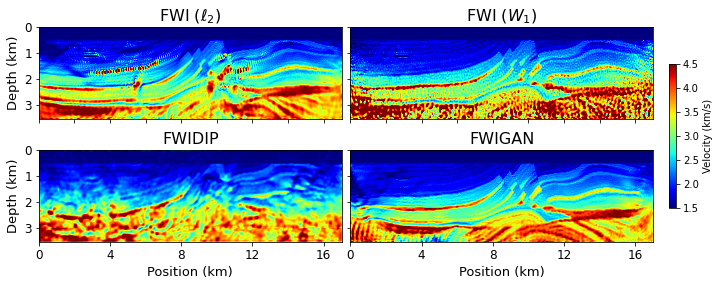

In [23]:
vmin, vmax = np.percentile(model_true/1000, [2,98])
num_cols = 2
num_rows = 2
fig = plt.figure(figsize=(10, 4.))

extent = [0, model_true.shape[1]*dx/1000., model_true.shape[0]*dx/1000., 0]
aspect = 'auto'
for i in range(num_cols*num_rows):
    ax1 = fig.add_subplot(num_rows,num_cols,i+1)
    if i==0:
        ax1.imshow(model_l2/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('FWI ($\ell_2$)',fontsize=16)
        plt.setp(ax1.get_xticklabels(), visible=False)
        ax1.set_ylabel('Depth (km)',fontsize=13)
        plt.yticks(np.arange(0,3.6,step=1),['0','1','2','3'],fontsize=12)
    if i==1:
        im3 = ax1.imshow(model_w1/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('FWI ($W_1$)',fontsize=16)
        plt.setp(ax1.get_yticklabels(), visible=False)
        plt.setp(ax1.get_xticklabels(), visible=False)
        cax3 = fig.add_axes([0.92, 0.25, 0.01, 0.5])
        cbar3 = plt.colorbar(mappable = im3, ax =ax1, cax = cax3, orientation = 'vertical')
        cbar3.set_label('Velocity (km/s)')
    if i==2:
        ax1.imshow(model_dip/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('FWIDIP',fontsize=16)
        ax1.set_xlabel('Position (km)',fontsize=13)
        ax1.set_ylabel('Depth (km)',fontsize=13)
        plt.yticks(np.arange(0,3.6,step=1),['0','1','2','3'],fontsize=12)
        plt.xticks(np.arange(0,17,step=4),['0','4','8','12','16'],fontsize=12)
    if i==3:
        ax1.imshow(model_gan/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('FWIGAN',fontsize=16)
        plt.setp(ax1.get_yticklabels(), visible=False)
        ax1.set_xlabel('Position (km)',fontsize=13)
        plt.xticks(np.arange(0,17,step=4),['0','4','8','12','16'],fontsize=12)

plt.tight_layout(pad=0.1, h_pad=1, w_pad=0.5, rect=[0, 0, 0.9, 0.95])
foo_fig = plt.gcf()
foo_fig.savefig(ResultPath1+str(dataname)+'_noisy_rec.eps',format='eps')
plt.show()

/tmp/ipykernel_61143/3158962374.py:73: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(pad=0.1, h_pad=1, w_pad=0.8, rect=[0, 0, 0.99, 0.99])
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


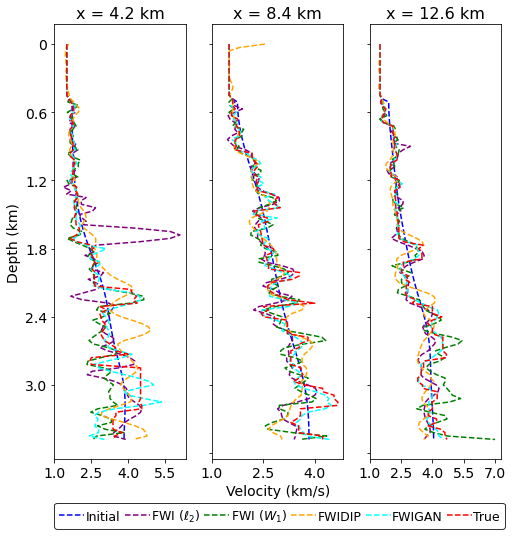

In [39]:
# plot vertical velocity-depth profile
num_cols = 3
num_rows = 1
hgrid = 117
fig = plt.figure(figsize=(8, 8))

for i in range(num_cols*num_rows):
    ax1 = fig.add_subplot(num_rows,num_cols,i+1)
    if i==0:
        line1, = ax1.plot(model_init[:,p1]/1000,np.arange(0,hgrid),color='blue',lw=1.5,ls='--',label='Initial')
        line2, = ax1.plot(model_l2[:,p1]/1000,np.arange(0,hgrid),color='purple',lw=1.5,ls='--',label='FWI ($\ell_2$)')
        line3, = ax1.plot(model_w1[:,p1]/1000,np.arange(0,hgrid),color='green',lw=1.5,ls='--',label='FWI ($W_1$)')
        line4, = ax1.plot(model_dip[:,p1]/1000,np.arange(0,hgrid),color='orange',lw=1.5,ls='--',label='FWIDIP')
        line5, = ax1.plot(model_gan[:,p1]/1000,np.arange(0,hgrid),color='cyan',lw=1.5,ls='--',label='FWIGAN')
        line6, = ax1.plot(model_true[:,p1]/1000,np.arange(0,hgrid),color='red',lw=1.5,ls='--',label='True')
        
        plt.legend(loc='lower left',bbox_to_anchor=(0, -0.16),
                   borderaxespad=0,ncol=6,columnspacing=0.35,handletextpad=0.1,
                   edgecolor='black',fontsize=12.5)
       
        plt.title('x = 4.2 km',fontsize=16)
        ax1.invert_yaxis()
        ax1.set_ylabel('Depth (km)',fontsize=14)
        
        plt.yticks(np.arange(0,hgrid+1,step=20),['0','0.6','1.2','1.8','2.4','3.0'],fontsize=14)
        plt.xticks(np.arange(1.,6.,step=1.5),fontsize=14)
        
    if i==1:
        line1, = ax1.plot(model_init[:,p2]/1000,np.arange(0,hgrid),color='blue',lw=1.5,ls='--',label='Initial')
        line2, = ax1.plot(model_l2[:,p2]/1000,np.arange(0,hgrid),color='purple',lw=1.5,ls='--',label='FWI ($\ell_2$)')
        line3, = ax1.plot(model_w1[:,p2]/1000,np.arange(0,hgrid),color='green',lw=1.5,ls='--',label='FWI ($W_1$)')
        line4, = ax1.plot(model_dip[:,p2]/1000,np.arange(0,hgrid),color='orange',lw=1.5,ls='--',label='FWIDIP')
        line5, = ax1.plot(model_gan[:,p2]/1000,np.arange(0,hgrid),color='cyan',lw=1.5,ls='--',label='FWIGAN')
        line6, = ax1.plot(model_true[:,p2]/1000,np.arange(0,hgrid),color='red',lw=1.5,ls='--',label='True')
        ax1.invert_yaxis()
        plt.title('x = 8.4 km',fontsize=16)
        ax1.set_xlabel('Velocity (km/s)',fontsize=14)
        plt.setp(ax1.get_yticklabels(), visible=False)
        
        plt.xticks(np.arange(1.,5.1,step=1.5),fontsize=14)
        
    if i==2:
        line1, = ax1.plot(model_init[:,p3]/1000,np.arange(0,hgrid),color='blue',lw=1.5,ls='--',label='Initial')
        line2, = ax1.plot(model_l2[:,p3]/1000,np.arange(0,hgrid),color='purple',lw=1.5,ls='--',label='FWI ($\ell_2$)')
        line3, = ax1.plot(model_w1[:,p3]/1000,np.arange(0,hgrid),color='green',lw=1.5,ls='--',label='FWI ($W_1$)')
        line4, = ax1.plot(model_dip[:,p3]/1000,np.arange(0,hgrid),color='orange',lw=1.5,ls='--',label='FWIDIP')
        line5, = ax1.plot(model_gan[:,p3]/1000,np.arange(0,hgrid),color='cyan',lw=1.5,ls='--',label='FWIGAN')
        line6, = ax1.plot(model_true[:,p3]/1000,np.arange(0,hgrid),color='red',lw=1.5,ls='--',label='True')

        
        ax1.invert_yaxis()
        plt.title('x = 12.6 km',fontsize=16)
        plt.setp(ax1.get_yticklabels(), visible=False)
        plt.xticks(np.arange(1.,7.1,step=1.5),fontsize=14)
        
plt.tight_layout(pad=0.1, h_pad=1, w_pad=0.8, rect=[0, 0, 0.99, 0.99])
foo_fig = plt.gcf()
foo_fig.savefig(ResultPath1+str(dataname)+'_noisy_vertical_v.eps',format='eps')
plt.show()


In [ ]:
## for linear initial model

In [1]:
import numpy as np
import scipy.io as spio
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# define the path
main_dir = '/home/fangshu/Code/pytorch/FWIGAN/'
ResultPath = main_dir + 'Comparison/linear/'
path1 = ResultPath+'marmousi/'
path2 = ResultPath+'marmousi2/'
path3 = ResultPath+'overthrust/'


dataname1 = 'mar_smal'
dataname2 = 'mar_big'
dataname3 = 'over'


In [3]:
def loadtruemodel(data_path,vmodel_dim):
    model_true = (np.fromfile(data_path, np.float32).reshape(vmodel_dim[1],vmodel_dim[0]))
    model_true = np.transpose(model_true,(1,0))
    return model_true
  
dir1 = main_dir+'data/'+str(dataname1)+str('_100_310')+'.bin'
model_true_1 = loadtruemodel(dir1, np.array([100, 310]))

dir2 = main_dir+'data/'+str(dataname2)+str('_117_567')+'.bin'
model_true_2 = loadtruemodel(dir2, np.array([117, 567]))

dir3 = main_dir+'data/'+str(dataname3)+str('_94_400')+'.bin'
model_true_3 = loadtruemodel(dir3, np.array([94, 400]))

In [6]:
# load initial model

initfile1 = path1+str(dataname1)+'_initmodel.mat'
model_mat = spio.loadmat(initfile1)
model_init_1 = np.float32(model_mat[str('initmodel')])

initfile2 = path2+str(dataname2)+'_initmodel.mat'
model_mat = spio.loadmat(initfile2)
model_init_2 = np.float32(model_mat[str('initmodel')])

initfile3 = path3+str(dataname3)+'_initmodel.mat'
model_mat = spio.loadmat(initfile3)
model_init_3 = np.float32(model_mat[str('initmodel')])

In [7]:
## for marmousi
# load result of FWIL2
l2file = path1+'FWIRec_L2.mat'
mat = spio.loadmat(l2file)
model_l2_1 = np.float32(mat[str('rec')])

# load result of FWIW1
w1file = path1+'FWIRec_W1.mat'
mat = spio.loadmat(w1file)
model_w1_1 = np.float32(mat[str('rec')])

# load result of FWIDIP
dipfile = path1+'DIPRec.mat'
mat = spio.loadmat(dipfile)
model_dip_1 = np.float32(mat[str('rec')])

# load result of FWIGAN
ganfile = path1+'GANRec.mat'
mat = spio.loadmat(ganfile)
model_gan_1 = np.float32(mat[str('rec')])


In [8]:
def compare_snr(img_test, img_true):
    return 20 * np.log10(np.linalg.norm(img_true.flatten()) / np.linalg.norm(img_true.flatten() - img_test.flatten()))
from utils.utils import ComputeSSIM,ComputeRE

l2_ssim = ComputeSSIM(model_l2_1,model_true_1)
w1_ssim = ComputeSSIM(model_w1_1,model_true_1)
dip_ssim = ComputeSSIM(model_dip_1,model_true_1)
gan_ssim = ComputeSSIM(model_gan_1,model_true_1)

l2_snr = compare_snr(model_l2_1,model_true_1)
w1_snr = compare_snr(model_w1_1,model_true_1)
dip_snr = compare_snr(model_dip_1,model_true_1)
gan_snr = compare_snr(model_gan_1,model_true_1)


l2_err = ComputeRE(model_l2_1,model_true_1)
w1_err = ComputeRE(model_w1_1,model_true_1)
dip_err = ComputeRE(model_dip_1,model_true_1)
gan_err = ComputeRE(model_gan_1,model_true_1)

np.savetxt(path1+'compare_result.txt', 
                           np.hstack((l2_ssim, l2_snr, l2_err,
                                      w1_ssim, w1_snr,w1_err,
                                      dip_ssim, dip_snr,dip_err,
                                      gan_ssim, gan_snr,gan_err)),fmt='%5.4f')

In [9]:
## for marmousi2
# load result of FWIL2
l2file = path2+'FWIRec_L2.mat'
mat = spio.loadmat(l2file)
model_l2_2 = np.float32(mat[str('rec')])

# load result of FWIW1
w1file = path2+'FWIRec_W1.mat'
mat = spio.loadmat(w1file)
model_w1_2 = np.float32(mat[str('rec')])

# load result of FWIDIP
dipfile = path2+'DIPRec.mat'
mat = spio.loadmat(dipfile)
model_dip_2 = np.float32(mat[str('rec')])

# load result of FWIGAN
ganfile = path2+'GANRec.mat'
mat = spio.loadmat(ganfile)
model_gan_2 = np.float32(mat[str('rec')])


In [11]:
def compare_snr(img_test, img_true):
    return 20 * np.log10(np.linalg.norm(img_true.flatten()) / np.linalg.norm(img_true.flatten() - img_test.flatten()))
from utils.utils import ComputeSSIM,ComputeRE

l2_ssim = ComputeSSIM(model_l2_2,model_true_2)
w1_ssim = ComputeSSIM(model_w1_2,model_true_2)
dip_ssim = ComputeSSIM(model_dip_2,model_true_2)
gan_ssim = ComputeSSIM(model_gan_2,model_true_2)

l2_snr = compare_snr(model_l2_2,model_true_2)
w1_snr = compare_snr(model_w1_2,model_true_2)
dip_snr = compare_snr(model_dip_2,model_true_2)
gan_snr = compare_snr(model_gan_2,model_true_2)


l2_err = ComputeRE(model_l2_2,model_true_2)
w1_err = ComputeRE(model_w1_2,model_true_2)
dip_err = ComputeRE(model_dip_2,model_true_2)
gan_err = ComputeRE(model_gan_2,model_true_2)

np.savetxt(path2+'compare_result.txt', 
                           np.hstack((l2_ssim, l2_snr, l2_err,
                                      w1_ssim, w1_snr,w1_err,
                                      dip_ssim, dip_snr,dip_err,
                                      gan_ssim, gan_snr,gan_err)),fmt='%5.4f')

In [12]:
## for overthrust
# load result of FWIL2
l2file = path3+'FWIRec_L2.mat'
mat = spio.loadmat(l2file)
model_l2_3 = np.float32(mat[str('rec')])

# load result of FWIW1
w1file = path3+'FWIRec_W1.mat'
mat = spio.loadmat(w1file)
model_w1_3 = np.float32(mat[str('rec')])

# load result of FWIDIP
dipfile = path3+'DIPRec.mat'
mat = spio.loadmat(dipfile)
model_dip_3 = np.float32(mat[str('rec')])

# load result of FWIGAN
ganfile = path3+'GANRec.mat'
mat = spio.loadmat(ganfile)
model_gan_3 = np.float32(mat[str('rec')])


In [13]:
def compare_snr(img_test, img_true):
    return 20 * np.log10(np.linalg.norm(img_true.flatten()) / np.linalg.norm(img_true.flatten() - img_test.flatten()))
from utils.utils import ComputeSSIM,ComputeRE

l2_ssim = ComputeSSIM(model_l2_3,model_true_3)
w1_ssim = ComputeSSIM(model_w1_3,model_true_3)
dip_ssim = ComputeSSIM(model_dip_3,model_true_3)
gan_ssim = ComputeSSIM(model_gan_3,model_true_3)

l2_snr = compare_snr(model_l2_3,model_true_3)
w1_snr = compare_snr(model_w1_3,model_true_3)
dip_snr = compare_snr(model_dip_3,model_true_3)
gan_snr = compare_snr(model_gan_3,model_true_3)


l2_err = ComputeRE(model_l2_3,model_true_3)
w1_err = ComputeRE(model_w1_3,model_true_3)
dip_err = ComputeRE(model_dip_3,model_true_3)
gan_err = ComputeRE(model_gan_3,model_true_3)

np.savetxt(path3+'compare_result.txt', 
                           np.hstack((l2_ssim, l2_snr, l2_err,
                                      w1_ssim, w1_snr,w1_err,
                                      dip_ssim, dip_snr,dip_err,
                                      gan_ssim, gan_snr,gan_err)),fmt='%5.4f')

/tmp/ipykernel_63833/4013771742.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.1, h_pad=0.1, w_pad=0.1, rect=[0, 0, 0.9, 0.95])


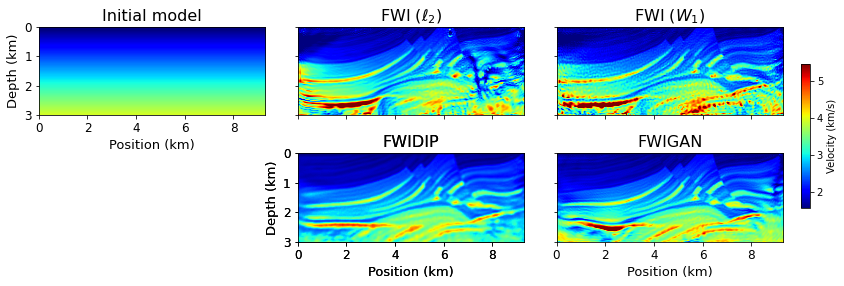

In [30]:
vmin, vmax = np.percentile(model_true_1/1000, [2,98])
dx = 30
num_cols = 3
num_rows = 2
fig = plt.figure(figsize=(12,4))

extent = [0, model_true_1.shape[1]*dx/1000., model_true_1.shape[0]*dx/1000., 0]
aspect = 'auto'

for i in range(num_cols*num_rows):
    if i==3:
        i+=1
    ax1 = fig.add_subplot(num_rows,num_cols,i+1)
    if i==0:
        ax1.imshow(model_init_1/1000, extent=extent, aspect=aspect,cmap='jet',
                  vmin=vmin, vmax=vmax)
        ax1.set_title('Initial model',fontsize=16)
        ax1.set_ylabel('Depth (km)',fontsize=13)
        ax1.set_xlabel('Position (km)',fontsize=13)
        
        plt.yticks(np.arange(0,3.1,step=1),['0','1','2','3'],fontsize=12)
        plt.xticks(np.arange(0,9.3,step=2),['0','2','4','6','8'],fontsize=12)
        
    if i==1:
        ax1.imshow(model_l2_1/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('FWI ($\ell_2$)',fontsize=16)
        plt.setp(ax1.get_xticklabels(), visible=False)
        plt.setp(ax1.get_yticklabels(), visible=False)
    if i==2:
        im2=ax1.imshow(model_w1_1/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('FWI ($W_1$)',fontsize=16)
      
        plt.setp(ax1.get_xticklabels(), visible=False)
        plt.setp(ax1.get_yticklabels(), visible=False)
        cax2 = fig.add_axes([0.92, 0.25, 0.01, 0.5])
        cbar2 = plt.colorbar(mappable = im2, ax =ax1, cax = cax2, orientation = 'vertical')
        cbar2.set_label('Velocity (km/s)')
     
    if i==4:
        ax1.imshow(model_dip_1/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('FWIDIP',fontsize=16)
        ax1.set_xlabel('Position (km)',fontsize=13)
        ax1.set_ylabel('Depth (km)',fontsize=13)
        plt.yticks(np.arange(0,3.1,step=1),['0','1','2','3'],fontsize=12)
        plt.xticks(np.arange(0,9.3,step=2),['0','2','4','6','8'],fontsize=12)
    if i==5:
        ax1.imshow(model_gan_1/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('FWIGAN',fontsize=16)
        plt.setp(ax1.get_yticklabels(), visible=False)
        ax1.set_xlabel('Position (km)',fontsize=13)
        plt.xticks(np.arange(0,9.3,step=2),['0','2','4','6','8'],fontsize=12)

plt.tight_layout(pad=0.1, h_pad=0.1, w_pad=0.1, rect=[0, 0, 0.9, 0.95])
foo_fig = plt.gcf()
foo_fig.savefig(path1+str(dataname1)+'_linear_rec.eps',format='eps')
plt.show()

/tmp/ipykernel_63833/2016118371.py:57: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.1, h_pad=0.1, w_pad=0.1, rect=[0, 0, 0.9, 0.95])


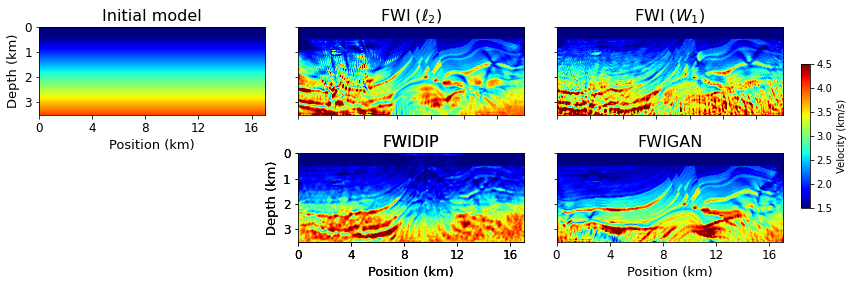

In [32]:
vmin, vmax = np.percentile(model_true_2/1000, [2,98])

dx = 30
num_cols = 3
num_rows = 2
fig = plt.figure(figsize=(12,4))
extent = [0, model_true_2.shape[1]*dx/1000., model_true_2.shape[0]*dx/1000., 0]
aspect = 'auto'

for i in range(num_cols*num_rows):
    if i==3:
        i+=1
    ax1 = fig.add_subplot(num_rows,num_cols,i+1)
    if i==0:
        ax1.imshow(model_init_2/1000, extent=extent, aspect=aspect,cmap='jet',
                  vmin=vmin, vmax=vmax)
        ax1.set_title('Initial model',fontsize=16)
        ax1.set_ylabel('Depth (km)',fontsize=13)
        ax1.set_xlabel('Position (km)',fontsize=13)
        
        plt.yticks(np.arange(0,3.6,step=1),['0','1','2','3'],fontsize=12)
        plt.xticks(np.arange(0,17,step=4),['0','4','8','12','16'],fontsize=12)
        
    if i==1:
        ax1.imshow(model_l2_2/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('FWI ($\ell_2$)',fontsize=16)
        plt.setp(ax1.get_xticklabels(), visible=False)
        plt.setp(ax1.get_yticklabels(), visible=False)
    if i==2:
        im2=ax1.imshow(model_w1_2/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('FWI ($W_1$)',fontsize=16)
        
        plt.setp(ax1.get_xticklabels(), visible=False)
        plt.setp(ax1.get_yticklabels(), visible=False)
        cax2 = fig.add_axes([0.92, 0.25, 0.01, 0.5])
        cbar2 = plt.colorbar(mappable = im2, ax =ax1, cax = cax2, orientation = 'vertical')
        cbar2.set_label('Velocity (km/s)')
     
    if i==4:
        ax1.imshow(model_dip_2/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('FWIDIP',fontsize=16)
        ax1.set_xlabel('Position (km)',fontsize=13)
        ax1.set_ylabel('Depth (km)',fontsize=13)
        plt.yticks(np.arange(0,3.6,step=1),['0','1','2','3'],fontsize=12)
        plt.xticks(np.arange(0,17,step=4),['0','4','8','12','16'],fontsize=12)
    if i==5:
        ax1.imshow(model_gan_2/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('FWIGAN',fontsize=16)
        plt.setp(ax1.get_yticklabels(), visible=False)
        ax1.set_xlabel('Position (km)',fontsize=13)
        plt.xticks(np.arange(0,17,step=4),['0','4','8','12','16'],fontsize=12)
plt.tight_layout(pad=0.1, h_pad=0.1, w_pad=0.1, rect=[0, 0, 0.9, 0.95])
foo_fig = plt.gcf()
foo_fig.savefig(path2+str(dataname2)+'_linear_rec.eps',format='eps')
plt.show()

/tmp/ipykernel_63833/1267917589.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=0.1, h_pad=0.1, w_pad=0.1, rect=[0, 0, 0.91, 0.95])


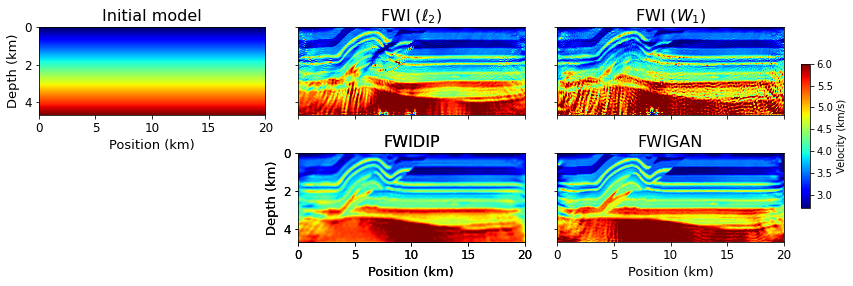

In [36]:
vmin, vmax = np.percentile(model_true_3/1000, [2,98])                          
                             
dx = 50
num_cols = 3
num_rows = 2
fig = plt.figure(figsize=(12,4))
extent = [0, model_true_3.shape[1]*dx/1000., model_true_3.shape[0]*dx/1000., 0]
aspect = 'auto'

for i in range(num_cols*num_rows):
    if i==3:
        i+=1
    ax1 = fig.add_subplot(num_rows,num_cols,i+1)
    if i==0:
        ax1.imshow(model_init_3/1000, extent=extent, aspect=aspect,cmap='jet',
                  vmin=vmin, vmax=vmax)
        ax1.set_title('Initial model',fontsize=16)
        ax1.set_ylabel('Depth (km)',fontsize=13)
        ax1.set_xlabel('Position (km)',fontsize=13)
        
        plt.yticks(np.arange(0,4.7,step=2),['0','2','4'],fontsize=12)
        plt.xticks(np.arange(0,21.,step=5),['0','5','10','15','20'],fontsize=12)
        
    if i==1:
        ax1.imshow(model_l2_3/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('FWI ($\ell_2$)',fontsize=16)
        plt.setp(ax1.get_xticklabels(), visible=False)
        plt.setp(ax1.get_yticklabels(), visible=False)
    if i==2:
        im2=ax1.imshow(model_w1_3/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('FWI ($W_1$)',fontsize=16)
        plt.setp(ax1.get_xticklabels(), visible=False)
        plt.setp(ax1.get_yticklabels(), visible=False)
        cax2 = fig.add_axes([0.92, 0.25, 0.01, 0.5])
        cbar2 = plt.colorbar(mappable = im2, ax =ax1, cax = cax2, orientation = 'vertical')
        cbar2.set_label('Velocity (km/s)')
     
    if i==4:
        ax1.imshow(model_dip_3/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('FWIDIP',fontsize=16)
        ax1.set_xlabel('Position (km)',fontsize=13)
        ax1.set_ylabel('Depth (km)',fontsize=13)
        plt.yticks(np.arange(0,4.7,step=2),['0','2','4'],fontsize=12)
        plt.xticks(np.arange(0,21.,step=5),['0','5','10','15','20'],fontsize=12)
    if i==5:
        ax1.imshow(model_gan_3/1000, extent=extent, aspect=aspect,cmap='jet',
             vmin=vmin, vmax=vmax)
        ax1.set_title('FWIGAN',fontsize=16)
        plt.setp(ax1.get_yticklabels(), visible=False)
        ax1.set_xlabel('Position (km)',fontsize=13)
        plt.xticks(np.arange(0,21.,step=5),['0','5','10','15','20'],fontsize=12)

plt.tight_layout(pad=0.1, h_pad=0.1, w_pad=0.1, rect=[0, 0, 0.91, 0.95])
foo_fig = plt.gcf()
foo_fig.savefig(path3+str(dataname3)+'_linear_rec.eps',format='eps')
plt.show()

/tmp/ipykernel_63833/1507526241.py:156: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout(pad=0.1, h_pad=0.5, w_pad=0.5, rect=[0, 0, 0.98, 0.98])


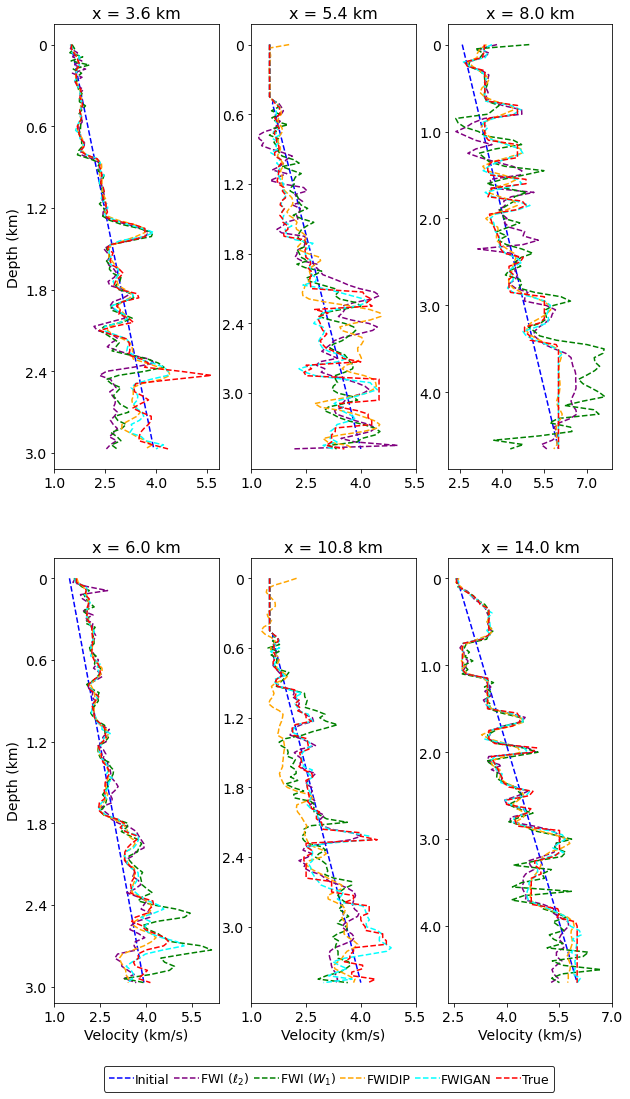

In [120]:
# plot vertical velocity-depth profile
p11 = 120
p21 = 200
hgrid1 = 100

p12 = 180
p22 = 360
hgrid2 = 117

p13 = 160
p23 = 280
hgrid3 = 94


num_cols = 3
num_rows = 2

fig = plt.figure(figsize=(10, 18))


for i in range(num_cols*num_rows):
    
    ax1 = fig.add_subplot(num_rows,num_cols,i+1)
    if i==0:
        line1, = ax1.plot(model_init_1[:,p11]/1000,np.arange(0,hgrid1),color='blue',lw=1.5,ls='--',label='Initial')
        line2, = ax1.plot(model_l2_1[:,p11]/1000,np.arange(0,hgrid1),color='purple',lw=1.5,ls='--',label='FWI ($\ell_2$)')
        line3, = ax1.plot(model_w1_1[:,p11]/1000,np.arange(0,hgrid1),color='green',lw=1.5,ls='--',label='FWI ($W_1$)')
        line4, = ax1.plot(model_dip_1[:,p11]/1000,np.arange(0,hgrid1),color='orange',lw=1.5,ls='--',label='FWIDIP')
        line5, = ax1.plot(model_gan_1[:,p11]/1000,np.arange(0,hgrid1),color='cyan',lw=1.5,ls='--',label='FWIGAN')
        line6, = ax1.plot(model_true_1[:,p11]/1000,np.arange(0,hgrid1),color='red',lw=1.5,ls='--',label='True')
        
        plt.title('x = 3.6 km',fontsize=16)
        ax1.invert_yaxis()
        ax1.set_ylabel('Depth (km)',fontsize=14)
        plt.yticks(np.arange(0,hgrid1+1,step=20),['0','0.6','1.2','1.8','2.4','3.0'],fontsize=14)
        plt.xticks(np.arange(1.,6.,step=1.5),fontsize=14)
        
    if i==3:
        line1, = ax1.plot(model_init_1[:,p21]/1000,np.arange(0,hgrid1),color='blue',lw=1.5,ls='--',label='Initial')
        line2, = ax1.plot(model_l2_1[:,p21]/1000,np.arange(0,hgrid1),color='purple',lw=1.5,ls='--',label='FWI ($\ell_2$)')
        line3, = ax1.plot(model_w1_1[:,p21]/1000,np.arange(0,hgrid1),color='green',lw=1.5,ls='--',label='FWI ($W_1$)')
        line4, = ax1.plot(model_dip_1[:,p21]/1000,np.arange(0,hgrid1),color='orange',lw=1.5,ls='--',label='FWIDIP')
        line5, = ax1.plot(model_gan_1[:,p21]/1000,np.arange(0,hgrid1),color='cyan',lw=1.5,ls='--',label='FWIGAN')
        line6, = ax1.plot(model_true_1[:,p21]/1000,np.arange(0,hgrid1),color='red',lw=1.5,ls='--',label='True')
         
        ax1.invert_yaxis()
        plt.title('x = 6.0 km',fontsize=16)
        ax1.set_xlabel('Velocity (km/s)',fontsize=14)   
        ax1.set_ylabel('Depth (km)',fontsize=14)
        plt.yticks(np.arange(0,hgrid1+1,step=20),['0','0.6','1.2','1.8','2.4','3.0'],fontsize=14)
        plt.xticks(np.arange(1.,6.1,step=1.5),fontsize=14)
        
    if i==1:
        
        line1, = ax1.plot(model_init_2[:,p12]/1000,np.arange(0,hgrid2),color='blue',lw=1.5,ls='--',label='Initial')
        line2, = ax1.plot(model_l2_2[:,p12]/1000,np.arange(0,hgrid2),color='purple',lw=1.5,ls='--',label='FWI ($\ell_2$)')
        line3, = ax1.plot(model_w1_2[:,p12]/1000,np.arange(0,hgrid2),color='green',lw=1.5,ls='--',label='FWI ($W_1$)')
        line4, = ax1.plot(model_dip_2[:,p12]/1000,np.arange(0,hgrid2),color='orange',lw=1.5,ls='--',label='FWIDIP')
        line5, = ax1.plot(model_gan_2[:,p12]/1000,np.arange(0,hgrid2),color='cyan',lw=1.5,ls='--',label='FWIGAN')
        line6, = ax1.plot(model_true_2[:,p12]/1000,np.arange(0,hgrid2),color='red',lw=1.5,ls='--',label='True')
        plt.title('x = 5.4 km',fontsize=16)
        ax1.invert_yaxis()
        plt.yticks(np.arange(0,hgrid2+1,step=20),['0','0.6','1.2','1.8','2.4','3.0'],fontsize=14)
        plt.xticks(np.arange(1.,6.,step=1.5),fontsize=14)
        
    if i==4:
        line1, = ax1.plot(model_init_2[:,p22]/1000,np.arange(0,hgrid2),color='blue',lw=1.5,ls='--',label='Initial')
        line2, = ax1.plot(model_l2_2[:,p22]/1000,np.arange(0,hgrid2),color='purple',lw=1.5,ls='--',label='FWI ($\ell_2$)')
        line3, = ax1.plot(model_w1_2[:,p22]/1000,np.arange(0,hgrid2),color='green',lw=1.5,ls='--',label='FWI ($W_1$)')
        line4, = ax1.plot(model_dip_2[:,p22]/1000,np.arange(0,hgrid2),color='orange',lw=1.5,ls='--',label='FWIDIP')
        line5, = ax1.plot(model_gan_2[:,p22]/1000,np.arange(0,hgrid2),color='cyan',lw=1.5,ls='--',label='FWIGAN')
        line6, = ax1.plot(model_true_2[:,p22]/1000,np.arange(0,hgrid2),color='red',lw=1.5,ls='--',label='True')
        ax1.invert_yaxis()
        plt.title('x = 10.8 km',fontsize=16)
        ax1.set_xlabel('Velocity (km/s)',fontsize=14)
       
        plt.yticks(np.arange(0,hgrid2+1,step=20),['0','0.6','1.2','1.8','2.4','3.0'],fontsize=14)
        plt.xticks(np.arange(1.,6.1,step=1.5),fontsize=14)
        
    if i==2:
        line1, = ax1.plot(model_init_3[:,p13]/1000,np.arange(0,hgrid3),color='blue',lw=1.5,ls='--',label='Initial')
        line2, = ax1.plot(model_l2_3[:,p13]/1000,np.arange(0,hgrid3),color='purple',lw=1.5,ls='--',label='FWI ($\ell_2$)')
        line3, = ax1.plot(model_w1_3[:,p13]/1000,np.arange(0,hgrid3),color='green',lw=1.5,ls='--',label='FWI ($W_1$)')
        line4, = ax1.plot(model_dip_3[:,p13]/1000,np.arange(0,hgrid3),color='orange',lw=1.5,ls='--',label='FWIDIP')
        line5, = ax1.plot(model_gan_3[:,p13]/1000,np.arange(0,hgrid3),color='cyan',lw=1.5,ls='--',label='FWIGAN')
        line6, = ax1.plot(model_true_3[:,p13]/1000,np.arange(0,hgrid3),color='red',lw=1.5,ls='--',label='True')
        
        plt.title('x = 8.0 km',fontsize=16)
        ax1.invert_yaxis()
        plt.yticks(np.arange(0,hgrid3+1,step=20),['0','1.0','2.0','3.0','4.0'],fontsize=14)
        plt.xticks(np.arange(2.5,7.1,step=1.5),fontsize=14)
    if i==5:
        line1, = ax1.plot(model_init_3[:,p23]/1000,np.arange(0,hgrid3),color='blue',lw=1.5,ls='--',label='Initial')
        line2, = ax1.plot(model_l2_3[:,p23]/1000,np.arange(0,hgrid3),color='purple',lw=1.5,ls='--',label='FWI ($\ell_2$)')
        line3, = ax1.plot(model_w1_3[:,p23]/1000,np.arange(0,hgrid3),color='green',lw=1.5,ls='--',label='FWI ($W_1$)')
        line4, = ax1.plot(model_dip_3[:,p23]/1000,np.arange(0,hgrid3),color='orange',lw=1.5,ls='--',label='FWIDIP')
        line5, = ax1.plot(model_gan_3[:,p23]/1000,np.arange(0,hgrid3),color='cyan',lw=1.5,ls='--',label='FWIGAN')
        line6, = ax1.plot(model_true_3[:,p23]/1000,np.arange(0,hgrid3),color='red',lw=1.5,ls='--',label='True')    
        ax1.invert_yaxis()
        plt.title('x = 14.0 km',fontsize=16)
        ax1.set_xlabel('Velocity (km/s)',fontsize=14)
        plt.xticks(np.arange(2.5,7.1,step=1.5),fontsize=14)
        
        plt.yticks(np.arange(0,hgrid3+1,step=20),['0','1.0','2.0','3.0','4.0'],fontsize=14)
        plt.legend(loc='lower left',bbox_to_anchor=(-2.1, -0.2),
                   borderaxespad=0,ncol=6,columnspacing=0.35,handletextpad=0.1,
                   edgecolor='black',fontsize=12.5)
plt.tight_layout(pad=0.1, h_pad=0.5, w_pad=0.5, rect=[0, 0, 0.98, 0.98])
foo_fig = plt.gcf()
foo_fig.savefig(main_dir + 'Comparison/linear/'+'linear_vertical_v.eps',format='eps')
plt.show()
